# **Проект: Анализ рынка продажи автомобилей (Казахстан), 2019 г. (Часть 2)**

## **0. Импорт библиотек и загрузка очищенного файла с данными**

In [1]:
# Загрузим библиотеки
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import plotly.express as px
from plotly import graph_objects as go
#import warnings
#warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Создадим датафрейм df на основе файла autokz2019.csv
df = pd.read_csv('https://github.com/VeraNovich/Yandex.Praktikum_WorkShop/raw/main/06_Auto_Kazakhstan/autokz2019_cleared.csv')
df.head(2)

,год_месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двигателя(л),коробка_передач,тип_привода,регион,количество,цена(usd),общая_стоимость_заказа(usd),область,сегментация_2013,класс_2013,производитель,объём_двигателя_класс,категория_заказа_количество,категория_заказа_цена
0,2019-05,Mercur Auto,Audi,A3,2018,DEU,бензин,1.4,АКПП,FWD,Алматы,1,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,EU,малый,1 автомобиль,от 25.000 до 35.000 USD
1,2019-08,Mercur Auto,Audi,A3,2018,DEU,бензин,1.4,АКПП,FWD,Алматы,1,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,EU,малый,1 автомобиль,от 25.000 до 35.000 USD


In [3]:
# Изменим тип данных столбца 'год_месяц'
df['год_месяц'] = pd.to_datetime(df['год_месяц']).dt.to_period("M")

In [4]:
# Выведем общую информацию об исходном файле с помощью метода .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39954 entries, 0 to 39953
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype    
---  ------                       --------------  -----    
 0   год_месяц                    39954 non-null  period[M]
 1   компания                     39954 non-null  object   
 2   бренд                        39954 non-null  object   
 3   модель                       39954 non-null  object   
 4   год_выпуска                  39954 non-null  int64    
 5   страна_производитель         39954 non-null  object   
 6   вид_топлива                  39954 non-null  object   
 7   объём_двигателя(л)           39954 non-null  float64  
 8   коробка_передач              39954 non-null  object   
 9   тип_привода                  39954 non-null  object   
 10  регион                       39954 non-null  object   
 11  количество                   39954 non-null  int64    
 12  цена(usd)                    39954 non-null  f

## **3. Исследовательский анализ данных (EDA)**

### **3.0. Цели раздела**

**Цели EDA:**

- понимание структуры и характеристик набора данных;
- выявление аномалий и выбросов;
- идентификация связей и корреляций между переменными;
- подготовка данных для дальнейших этапов анализа.

**Шаги EDA:**

- анализ распределения числовых переменных;
- изучение описательных статистик;
- исследование корреляций между числовыми переменными;
- выявление выбросов и аномалий;
- изучение категориальных переменных - их распределение и частоты;
- визуализация результатов EDA:
           - гистограммы;
           - диаграмма рассеяния;
           - ящик с усами;
           - тепловые карты (heatmap).


In [5]:
# Объявим функцию для EDA столбца (тип данных object)
def info_column_object(col, m=5):
  print(f"Изучим столбец {col.name} с помощью метода .describe()")
  print()
  print(col.describe())
  print()
  print(f"Выведем топ-{m} столбца {col.name} по количеству заказов в анализируемом периоде")
  print()
  temp = col.value_counts().reset_index()
  temp.columns = [f'{col.name}', 'количество_заказов']
  print(temp.head(m))
  print()
  print(f"Выведем анти_топ-{m} столбца {col.name} по количеству заказов в анализируемом периоде")
  print(temp.tail(m))
  print()
  print(f"Построим график количество заказов в разрезе показателей столбца {col.name}")
  temp.plot(x = f'{col.name}', y = 'количество_заказов', kind = 'bar', figsize=(14, 4), edgecolor = 'black')
  plt.axhline(y = temp['количество_заказов'].mean(), color = 'r', linestyle = '--')
  plt.title(f'Количество заказов в разрезе показателей столбца {col.name} за анализируемый период')
  plt.xlabel(f'{col.name}')
  plt.ylabel('Кол-во заказов, ед.')
  plt.show()


### **3.1. Год_месяц**

In [6]:
# Изучим столбец 'год_месяц' с помощью метода .describe()
df['год_месяц'].describe()

count       39954
unique          9
top       2019-07
freq         5929
Name: год_месяц, dtype: object

In [7]:
# Создадим временный датафрейм на базе value_counts() столбца 'год_месяц'
# Выведем топ-3 месяцев по количеству заказов в анализируемом периоде
temp = df['год_месяц'].value_counts().reset_index()
temp.columns = ['год_месяц', 'количество_заказов']
temp.head(3)

,год_месяц,количество_заказов
0,2019-07,5929
1,2019-09,5312
2,2019-08,4805


In [8]:
# Выведем анти_топ-3 месяцев по количеству заказов в анализируемом периоде
temp.tail(3)

,год_месяц,количество_заказов
6,2019-03,3662
7,2019-01,3381
8,2019-02,3136


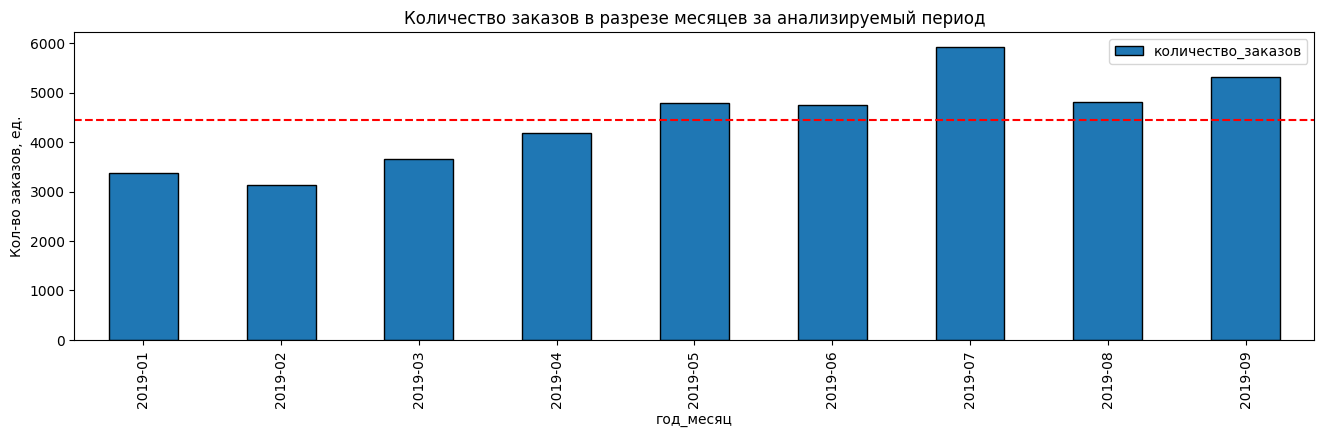

In [9]:
# Построим график количество заказов в разрезе месяцев за анализируемый период
temp.sort_values(by='год_месяц').plot(x = 'год_месяц', y = 'количество_заказов', kind = 'bar', figsize=(16, 4), edgecolor = 'black')
plt.axhline(y = temp['количество_заказов'].mean(), color = 'r', linestyle = '--')
plt.title('Количество заказов в разрезе месяцев за анализируемый период')
plt.xlabel('год_месяц')
plt.ylabel('Кол-во заказов, ед.')
plt.show();

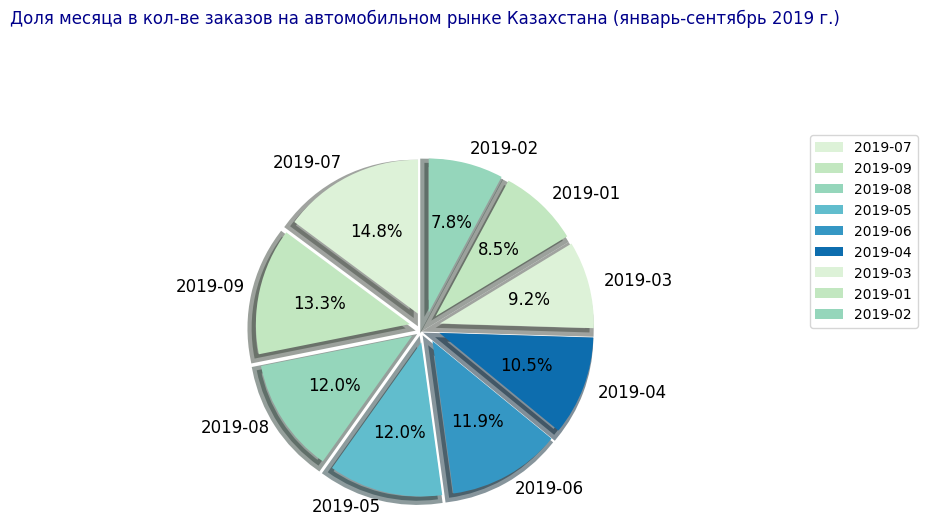

In [10]:
# Построим круговую диаграмму с долей каждого месяца в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(5, 5))
explode = [0.1]*9
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['год_месяц'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':12},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля месяца в кол-ве заказов на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['год_месяц'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- анализируемый период 9 месяцев - январь-февраль 2019 года;
- наибольшее кол-во заказов в июле и сентябре, 14.8% и 13.3% соответственно;
- наименьшее количество заказов в январе и феврале, 8.5% и 7.8% соответственно.

В июле количество заказов почти в 2 раза выше, чем в феврале. Можно предположить наличие сезонности на авторынке Казахстана.
____________
____________

### **3.2. Компании**

In [11]:
# Изучим столбец 'компания' с помощью метода .describe()
df['компания'].describe()

count                       39954
unique                         33
top       Toyota Motor Kazakhstan
freq                        11951
Name: компания, dtype: object

In [12]:
# Создадим временный датафрейм на базе value_counts() столбца 'компания'
# Выведем топ-5 компаний по количеству заказов в анализируемом периоде
temp = df['компания'].value_counts().reset_index()
temp.columns = ['компания', 'количество_заказов']
temp.head(10)

,компания,количество_заказов
0,Toyota Motor Kazakhstan,11951
1,Astana Motors,10169
2,БИПЭК АВТО,3616
3,Вираж,2908
4,Allur Auto,2526
5,Renault Россия,1796
6,Ravon Motors Kazakstan,1506
7,Nissan Manufacturing RUS,1149
8,ТК КАМАЗ,891
9,Mercur Auto,643


In [13]:
# Выведем анти_топ-5 компаний по количеству заказов в анализируемом периоде
temp.tail(5)

,компания,количество_заказов
28,"ТОО ""Eurasia Motor Zhaik""",15
29,Scania Central Asia,12
30,Daewoo Bus Kazakhstan,10
31,MAN Truck & Bus Kazakhstan,6
32,Caspian Motors,3


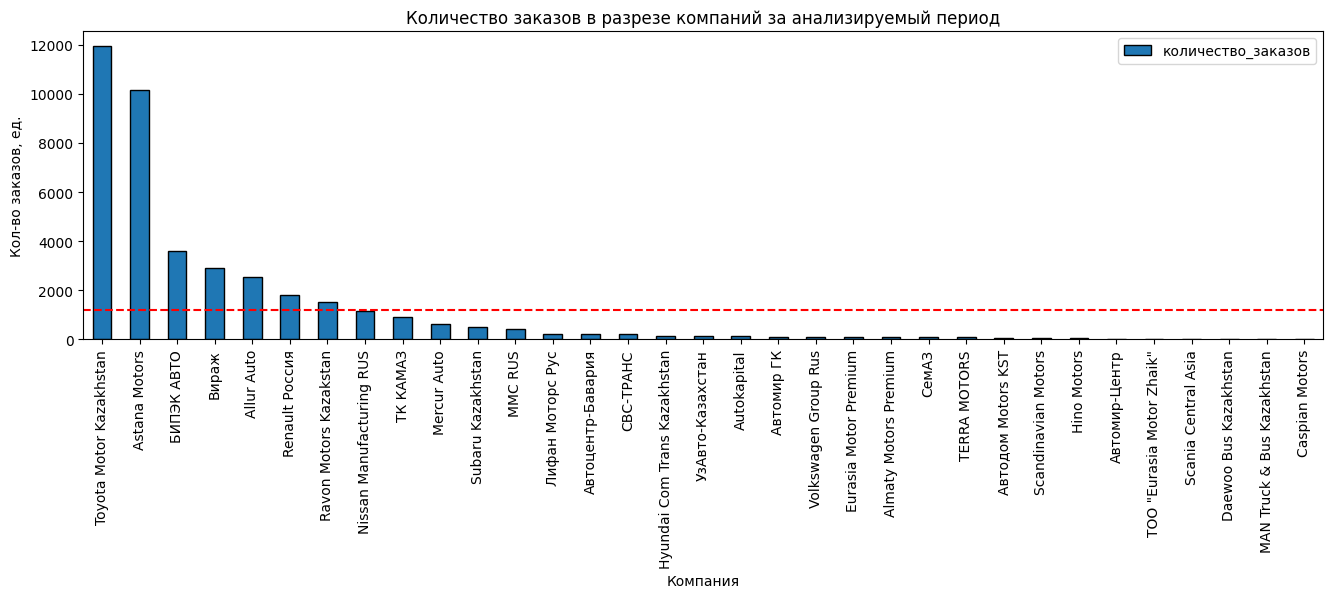

In [14]:
# Построим график количество заказов в разрезе компаний за анализируемый период
temp.plot(x = 'компания', y = 'количество_заказов', kind = 'bar', figsize=(16, 4), edgecolor = 'black')
plt.axhline(y = temp['количество_заказов'].mean(), color = 'r', linestyle = '--')
plt.title('Количество заказов в разрезе компаний за анализируемый период')
plt.xlabel('Компания')
plt.ylabel('Кол-во заказов, ед.')
plt.show();

In [15]:
# Создадим временный датафрейм для определения доли топ-5 компаний на авторынке Казахстана
def com_cat(temp):
  if temp['количество_заказов']>2500:
    return temp['компания']
  else:
    return 'прочие'
temp['компания2'] = temp.apply(com_cat, axis = 1)
temp = temp.groupby('компания2').agg({'количество_заказов':'sum'}).reset_index().sort_values(by='количество_заказов', ascending=False)
temp

,компания2,количество_заказов
2,Toyota Motor Kazakhstan,11951
1,Astana Motors,10169
5,прочие,8784
3,БИПЭК АВТО,3616
4,Вираж,2908
0,Allur Auto,2526


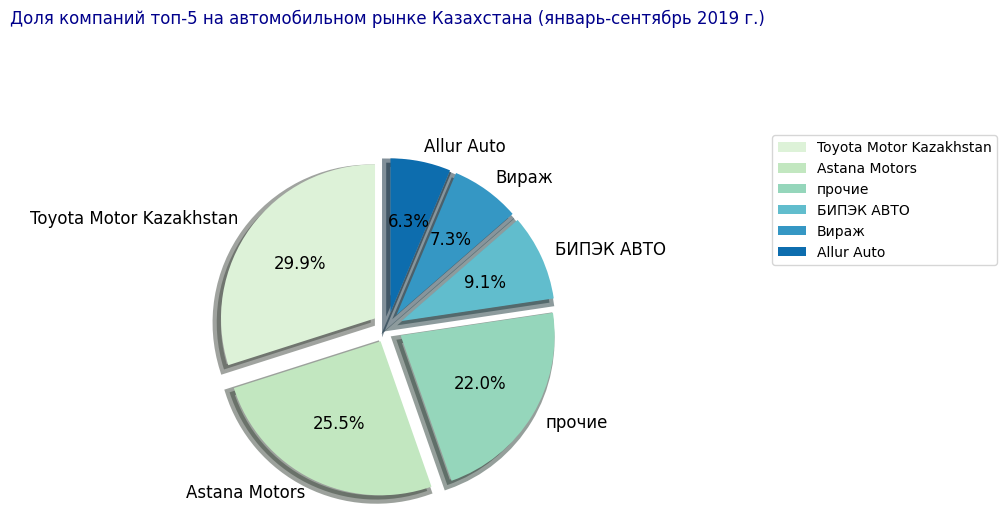

In [16]:
# Построим круговую диаграмму с долей компаний топ-5 в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(5, 5))
explode = [0.1]*6
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['компания2'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':12},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля компаний топ-5 на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['компания2'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- на рынке Казахстана в 2019 г было 33 компании;
- только 7 компаний имели количество заказов выше среднего по рынку;
- на долю 5 крупнейших компаний приходится 78% заказов;
- на долю 2-х крупнейших компаний приходится 55% от общего числа заказов.

Лидером рынка является Toyota Motor Kazakhstan, что особенно интересно с учетом того, что в 2019 г. в казахстане не было производства Toyota.
____________
____________

### **3.3. Бренд**

In [17]:
# Изучим столбец 'бренд' с помощью метода .describe()
df['бренд'].describe()

count      39954
unique        44
top       Toyota
freq       10745
Name: бренд, dtype: object

In [18]:
# Создадим временный датафрейм на базе value_counts() столбца 'бренд'
# Выведем топ-5 брендов по количеству заказов в анализируемом периоде
temp = df['бренд'].value_counts().reset_index()
temp.columns = ['бренд', 'количество_заказов']
temp.head(5)

,бренд,количество_заказов
0,Toyota,10745
1,Hyundai,10322
2,Jac,1991
3,Lada,1967
4,GAZ,1820


In [19]:
# Выведем анти_топ-5 брендов по количеству заказов в анализируемом периоде
temp.tail(5)

,бренд,количество_заказов
39,MAN,11
40,Dong Feng,10
41,Daewoo,10
42,Ford,3
43,Nefaz,1


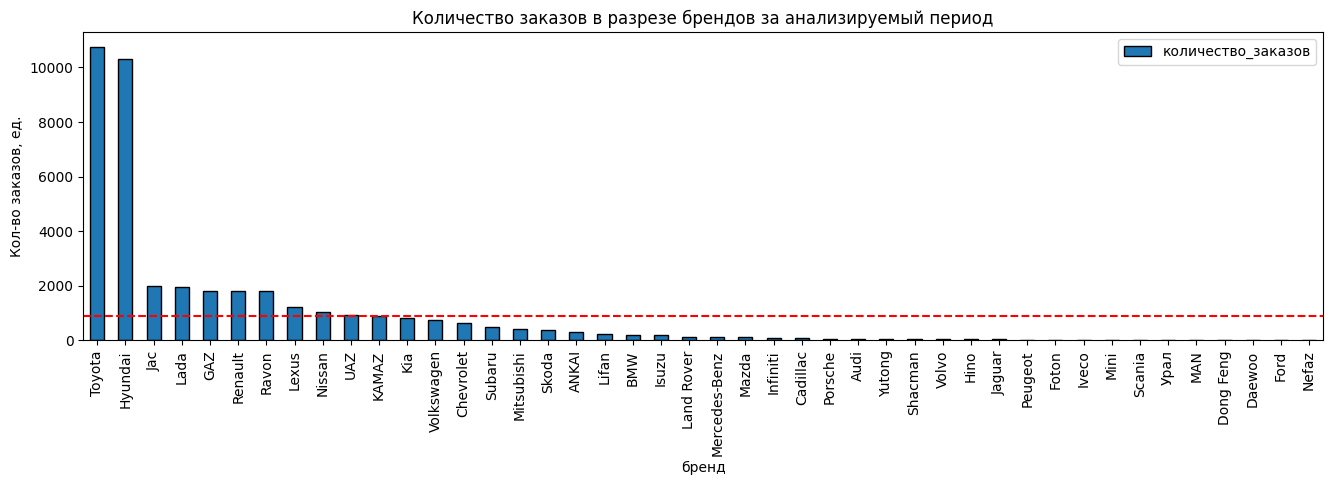

In [20]:
# Построим график количество заказов в разрезе брендов за анализируемый период
temp.plot(x = 'бренд', y = 'количество_заказов', kind = 'bar', figsize=(16, 4), edgecolor = 'black')
plt.axhline(y = temp['количество_заказов'].mean(), color = 'r', linestyle = '--')
plt.title('Количество заказов в разрезе брендов за анализируемый период')
plt.xlabel('бренд')
plt.ylabel('Кол-во заказов, ед.')
plt.show();

In [21]:
# Создадим временный датафрейм для определения доли топ-10 брендов на авторынке Казахстана
def cat(temp):
  if temp['количество_заказов']>1800:
    return temp['бренд']
  else:
    return 'прочие'
temp['бренд'] = temp.apply(cat, axis = 1)
temp = temp.groupby('бренд').agg({'количество_заказов':'sum'}).reset_index().sort_values(by='количество_заказов', ascending=False)
temp

,бренд,количество_заказов
5,прочие,13109
4,Toyota,10745
1,Hyundai,10322
2,Jac,1991
3,Lada,1967
0,GAZ,1820


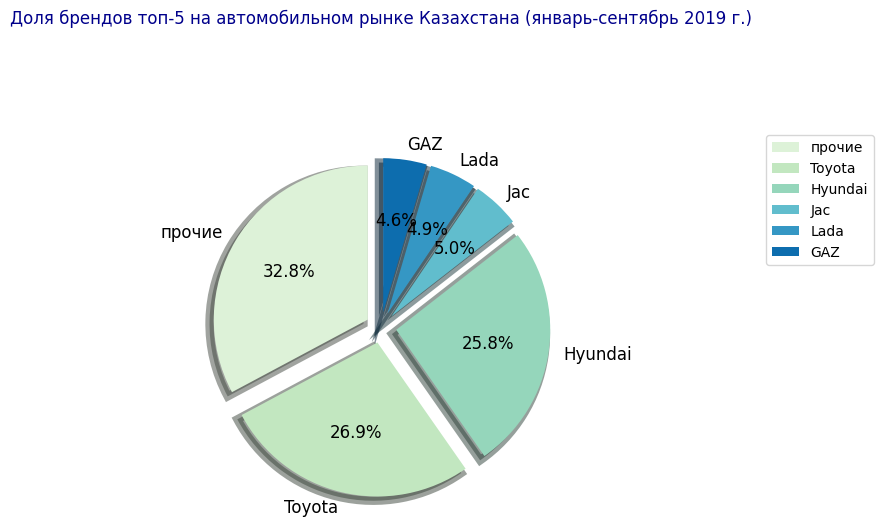

In [22]:
# Построим круговую диаграмму с долей брендов топ-5 в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(5, 5))
explode = [0.1]*6
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['бренд'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':12},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля брендов топ-5 на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['бренд'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- на рынке Казахстана в 2019 г было представлено 44 бренда;
- только 9 брендов имели количество заказов выше среднего по рынку;
- на долю 5 крупнейших брендов приходится 85% заказов;
- на долю 2-х крупнейших брендов приходится 60% от общего числа заказов.

Лидерами рынка является Toyota и Hyundai.
____________
____________

### **3.4. Модель**

In [23]:
# Изучим столбец 'модель' с помощью метода .describe()
df['модель'].describe()

count     39954
unique      272
top       Camry
freq       4853
Name: модель, dtype: object

In [24]:
# Создадим временный датафрейм на базе value_counts() столбца 'модель'
# Выведем топ-10 моделей по количеству заказов в анализируемом периоде
temp = df['модель'].value_counts().reset_index()
temp.columns = ['модель', 'количество_заказов']
temp.head(10)

,модель,количество_заказов
0,Camry,4853
1,Tucson,3271
2,Accent,2211
3,Elantra,2062
4,Creta,1775
5,LC Prado,1711
6,Nexia R3,1699
7,S3,1286
8,RAV4,1213
9,Corolla,1089


In [25]:
# Выведем анти_топ-5 моделей по количеству заказов в анализируемом периоде
temp.tail(5)

,модель,количество_заказов
267,NMS85,1
268,HD 79,1
269,i8,1
270,8 серия,1
271,F-Type,1


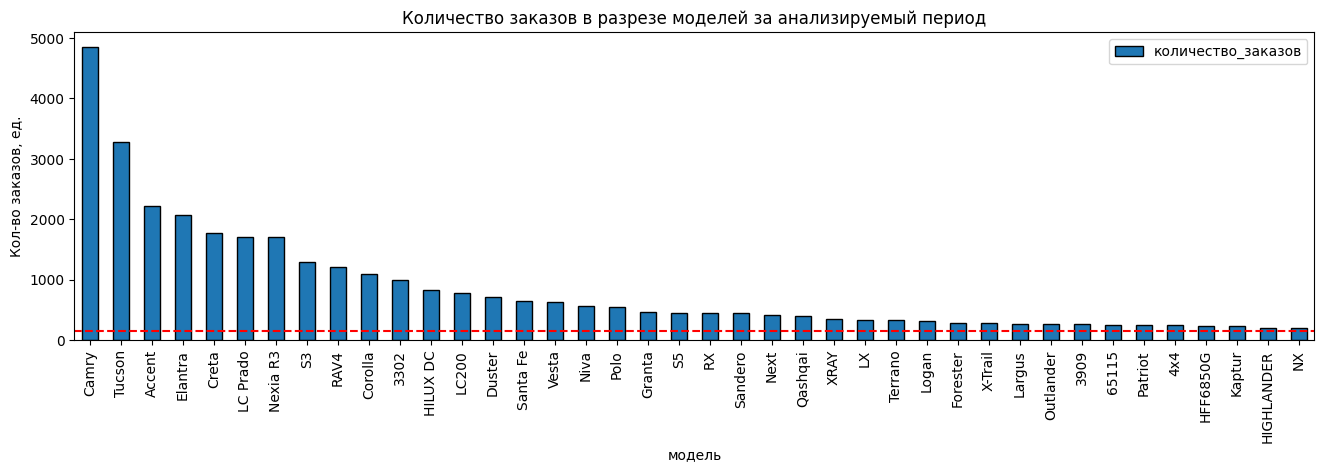

In [26]:
# Построим график количество заказов в разрезе моделей за анализируемый период
temp.head(40).plot(x = 'модель', y = 'количество_заказов', kind = 'bar', figsize=(16, 4), edgecolor = 'black')
plt.axhline(y = temp['количество_заказов'].mean(), color = 'r', linestyle = '--')
plt.title('Количество заказов в разрезе моделей за анализируемый период')
plt.xlabel('модель')
plt.ylabel('Кол-во заказов, ед.')
plt.show();

In [27]:
# Создадим временный датафрейм для определения доли топ-10 моделей на авторынке Казахстана
def cat(temp):
  if temp['количество_заказов']>1000:
    return temp['модель']
  else:
    return 'прочие'
temp['модель'] = temp.apply(cat, axis = 1)
temp = temp.groupby('модель').agg({'количество_заказов':'sum'}).reset_index().sort_values(by='количество_заказов', ascending=False)
temp

,модель,количество_заказов
10,прочие,18784
1,Camry,4853
9,Tucson,3271
0,Accent,2211
4,Elantra,2062
3,Creta,1775
5,LC Prado,1711
6,Nexia R3,1699
8,S3,1286
7,RAV4,1213


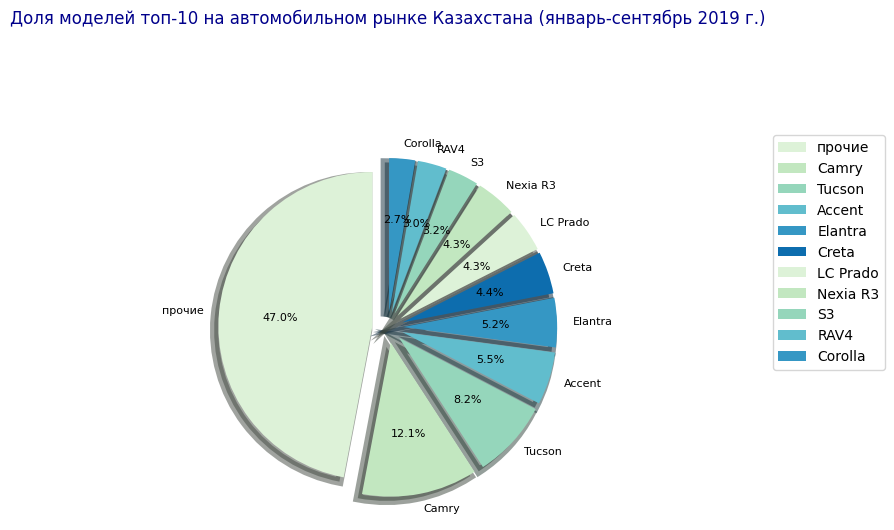

In [28]:
# Построим круговую диаграмму с долей моделей топ-10 в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(5, 5))
explode = [0.1]*11
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['модель'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':8},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля моделей топ-10 на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['модель'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- на рынке Казахстана в 2019 г было представлено 272 модели автомобилей;
- порядка 40 моделей имели количество заказов выше среднего по рынку;
- на долю 10 моделей приходится 53% заказов;
- на долю 2-х моделей приходится 20% от общего числа заказов.

Лидерами рынка является Camry и Tucson.
____________
____________

### **3.5. Год выпуска**

In [29]:
# Создадим временный датафрейм на базе value_counts() столбца 'год_выпуска'
temp = df['год_выпуска'].value_counts().reset_index()
temp.columns = ['год_выпуска', 'количество_заказов']
temp

,год_выпуска,количество_заказов
0,2019,30522
1,2018,9078
2,2017,324
3,2016,30


In [30]:
# Создадим временный датафрейм для построения графика количество проданных автомобилей в разрезе года выпуска
temp2 = df.pivot_table(index = ['год_месяц', 'год_выпуска'], values='количество', aggfunc='sum').reset_index()
temp2.head(2)

,год_месяц,год_выпуска,количество
0,2019-01,2016,7
1,2019-01,2017,42


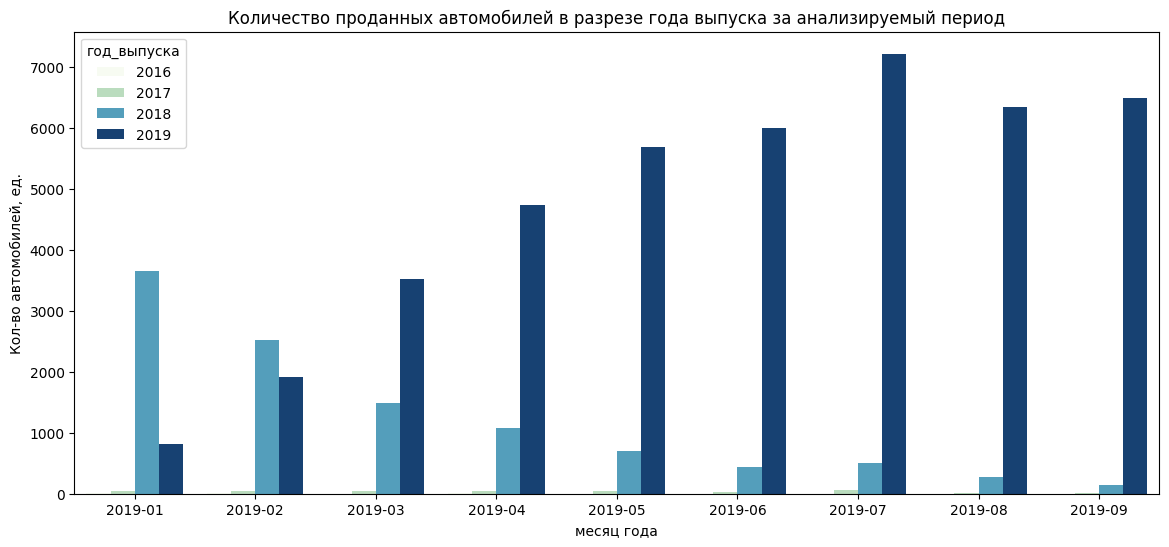

In [31]:
# Построим график количества проданных автомобилей в разрезе года выпуска за анализируемый период
plt.figure(figsize=(14, 6))
sns.barplot(temp2, x="год_месяц", y="количество", hue="год_выпуска", palette = 'GnBu')
plt.title('Количество проданных автомобилей в разрезе года выпуска за анализируемый период')
plt.xlabel('месяц года')
plt.ylabel('Кол-во автомобилей, ед.')
plt.show();

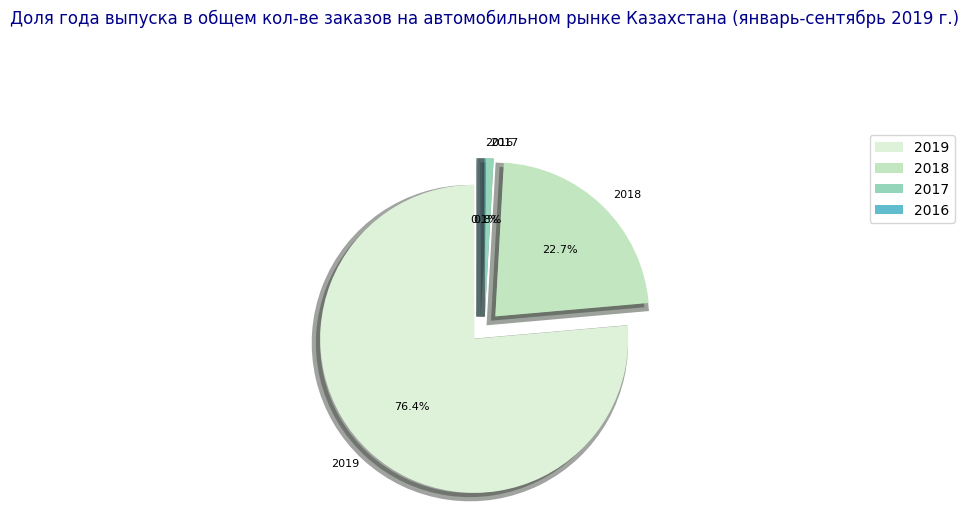

In [32]:
# Построим круговую диаграмму с долей года выпуска в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(5, 5))
explode = [0.1]*4
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['год_выпуска'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':8},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля года выпуска в общем кол-ве заказов на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['год_выпуска'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- на рынке новых автомобилей Казахстана в 2019 г было представлено 4 года выпуска;
- в начале года на рынке продаются в основном автомобили прошлого года выпуска, но уже в феврале их доля начинает резко снижаться, уступая место автомобилям текущего года выпуска;
- как и следовало ожидать основной объем заказов 76% приходится на автомобили текущего 2019 года выпуска.
- 23% заказов приходится на автомобили 2018 г., но это временное явление, в целом их доля существенно сократиться за счет заказов 4-го квартала.

____________
____________

### **3.6. Cтрана_производитель**

In [33]:
# Изучим столбец 'страна_производитель' с помощью метода .describe()
df['страна_производитель'].describe()

count     39954
unique       19
top         KAZ
freq      19359
Name: страна_производитель, dtype: object

In [34]:
# Создадим временный датафрейм на базе value_counts() столбца 'страна_производитель'
# Выведем топ-5 стран производителей по количеству заказов авто из пр-ва в анализируемом периоде
temp = df['страна_производитель'].value_counts().reset_index()
temp.columns = ['страна_производитель', 'количество_заказов']
temp.head(5)

,страна_производитель,количество_заказов
0,KAZ,19359
1,RUS,12844
2,JPN,4595
3,TUR,1167
4,THA,970


In [35]:
# Выведем анти_топ-5 стран-производителей по количеству заказов на авто их пр-ва в анализируемом периоде
temp.tail(5)

,страна_производитель,количество_заказов
14,ESP,9
15,POL,6
16,BEL,6
17,HUN,2
18,BLR,1


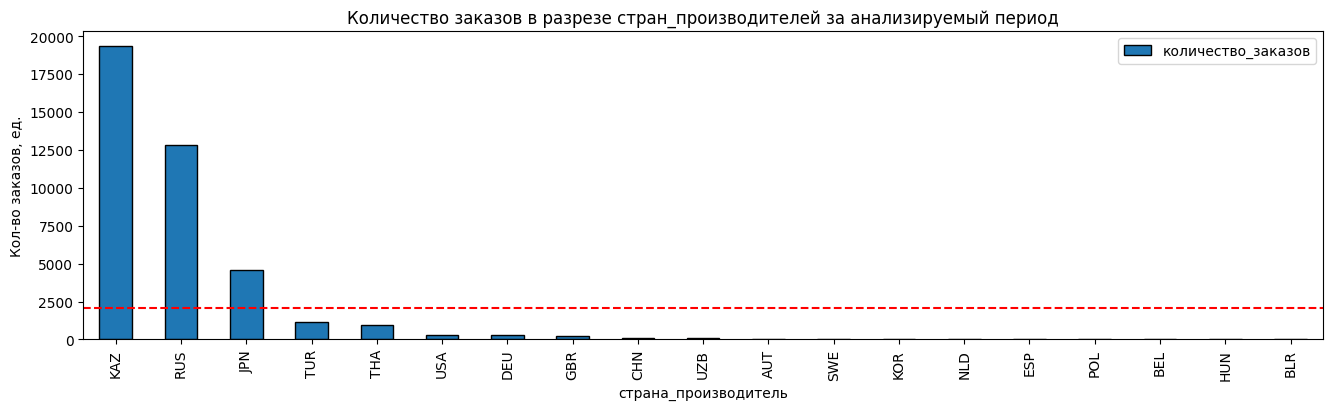

In [36]:
# Построим график количество заказов в разрезе стран-производителей за анализируемый период
temp.head(40).plot(x = 'страна_производитель', y = 'количество_заказов', kind = 'bar', figsize=(16, 4), edgecolor = 'black')
plt.axhline(y = temp['количество_заказов'].mean(), color = 'r', linestyle = '--')
plt.title('Количество заказов в разрезе стран_производителей за анализируемый период')
plt.xlabel('страна_производитель')
plt.ylabel('Кол-во заказов, ед.')
plt.show();

In [37]:
# Создадим временный датафрейм для определения доли топ-5 стран_производителей на авторынке Казахстана
def cat(temp):
  if temp['количество_заказов']>900:
    return temp['страна_производитель']
  else:
    return 'прочие'
temp['страна_производитель'] = temp.apply(cat, axis = 1)
temp = temp.groupby('страна_производитель').agg({'количество_заказов':'sum'}).reset_index().sort_values(by='количество_заказов', ascending=False)
temp

,страна_производитель,количество_заказов
1,KAZ,19359
2,RUS,12844
0,JPN,4595
4,TUR,1167
5,прочие,1019
3,THA,970


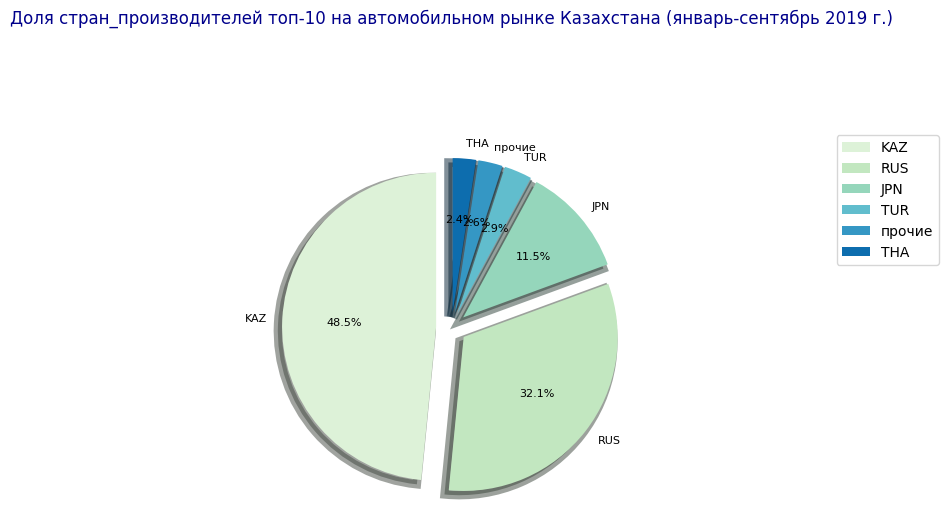

In [38]:
# Построим круговую диаграмму с долей стран-производителей в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(5, 5))
explode = [0.1]*6
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['страна_производитель'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':8},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля стран_производителей топ-10 на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['страна_производитель'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- на рынке Казахстана в 2019 г было представлено 19 стран-производителей;
- только 3 страны-производителя имели количество заказов выше среднего по рынку;
- на долю 2 стран-производителей приходится 91% заказов;
- на долю 2-х стран-производителей приходится 80% от общего числа заказов.

Лидерами рынка является Казахстан и Россия.
____________
____________

### **3.7. Вид_топлива**

In [39]:
# Изучим столбец 'вид_топлива' с помощью метода .describe()
df['вид_топлива'].describe()

count      39954
unique         4
top       бензин
freq       37792
Name: вид_топлива, dtype: object

In [40]:
# Создадим временный датафрейм на базе value_counts() столбца 'вид_топлива'
temp = df['вид_топлива'].value_counts().reset_index()
temp.columns = ['вид_топлива', 'количество_заказов']
temp

,вид_топлива,количество_заказов
0,бензин,37792
1,дизель,2138
2,электричество,14
3,гибрид,10


______
_____
**Промежутоный вывод:**

- на рынке Казахстана в 2019 г было представлено 4 вида автомобилей в зависимости от используемого вида топлива;
- однозначный лидер по виду используемого топлива - автомобили с бензиновым двигателем.
____________
____________

### **3.8. Объём_двигателя(л)**

In [41]:
# Изучим столбец 'объём_двигателя(л)' с помощью метода .describe()
df['объём_двигателя(л)'].describe()

count    39954.000000
mean         2.288011
std          0.969755
min          1.200000
25%          1.600000
50%          2.000000
75%          2.500000
max         26.700000
Name: объём_двигателя(л), dtype: float64

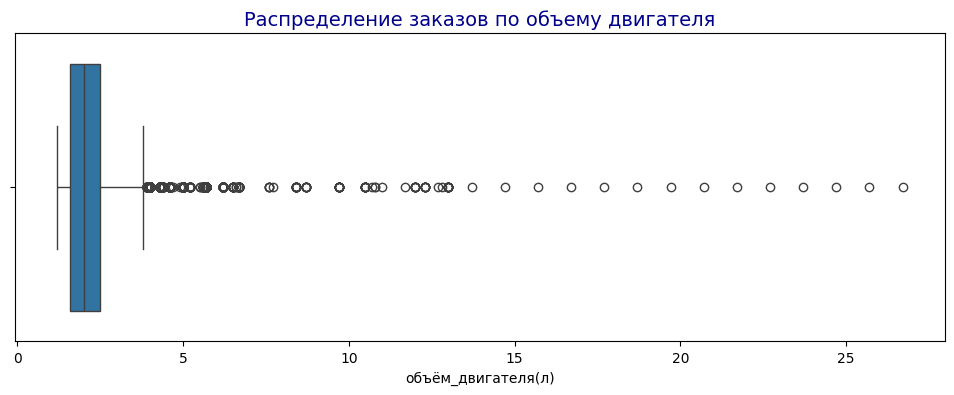

In [42]:
# Построим ящик с усами для визуализации описательных статистик
plt.figure(figsize=(12, 4))
sns.boxplot(x = df['объём_двигателя(л)'])
plt.xlabel('объём_двигателя(л)')
plt.title('Распределение заказов по объему двигателя', size=14, color='darkblue')
plt.show()

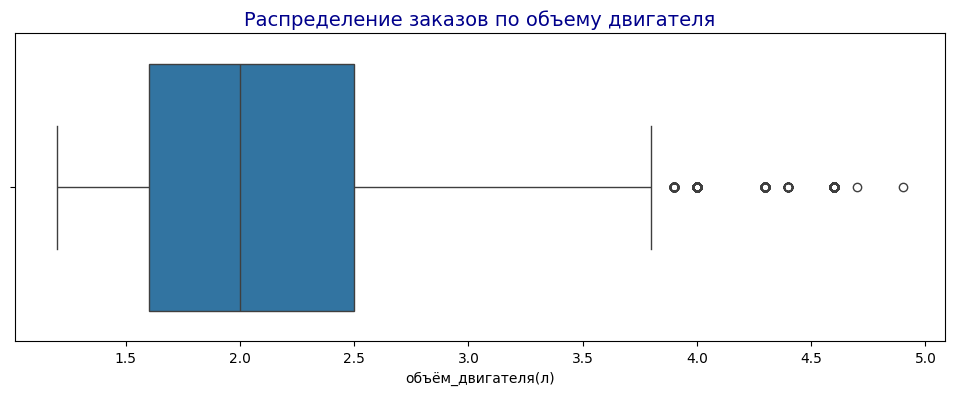

In [43]:
# Ограничим двигатели объемом 5 л
plt.figure(figsize=(12, 4))
sns.boxplot(x = df.loc[df['объём_двигателя(л)']<5, 'объём_двигателя(л)'])
plt.xlabel('объём_двигателя(л)')
plt.title('Распределение заказов по объему двигателя', size=14, color='darkblue')
plt.show()

In [44]:
# Создадим временный датафрейм на базе value_counts() столбца 'объём_двигателя_класс'
temp = df['объём_двигателя_класс'].value_counts().reset_index()
temp.columns = ['объём_двигателя_класс', 'количество_заказов']
temp

,объём_двигателя_класс,количество_заказов
0,средний,23113
1,малый,13855
2,большой,2788
3,особо-малый,198


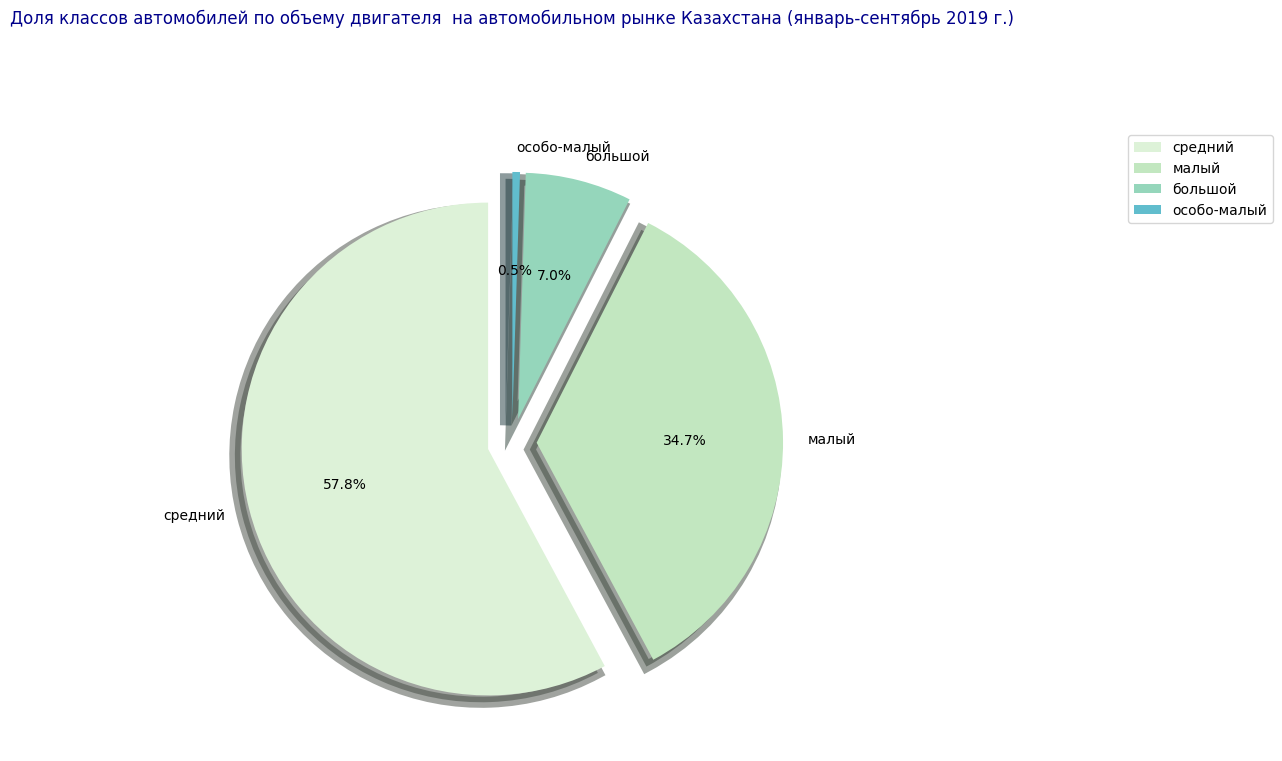

In [45]:
# Построим круговую диаграмму с долей классов автомобилей по объему двигателя в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(8, 8))
explode = [0.1]*4
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['объём_двигателя_класс'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':10},
        wedgeprops = {'linewidth': 8},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля классов автомобилей по объему двигателя  на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['объём_двигателя_класс'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- на рынке Казахстана в 2019 г было представлено большое разнообразие автомобилей по объему двигателя;
- наибольшее количество заказов приходится на автомобили среднего класса по объему двигателя - 58%;
- на втором месте по количеству заказов автомобили малого класса по объему двигателя.
____________
____________

### **3.9. Коробка_передач**

In [46]:
# Изучим столбец 'коробка_передач' с помощью метода .describe()
df['коробка_передач'].describe()

count     39954
unique        2
top        АКПП
freq      31534
Name: коробка_передач, dtype: object

In [47]:
# Создадим временный датафрейм на базе value_counts() столбца 'коробка_передач'
temp = df['коробка_передач'].value_counts().reset_index()
temp.columns = ['коробка_передач', 'количество_заказов']
temp

,коробка_передач,количество_заказов
0,АКПП,31534
1,МКПП,8420


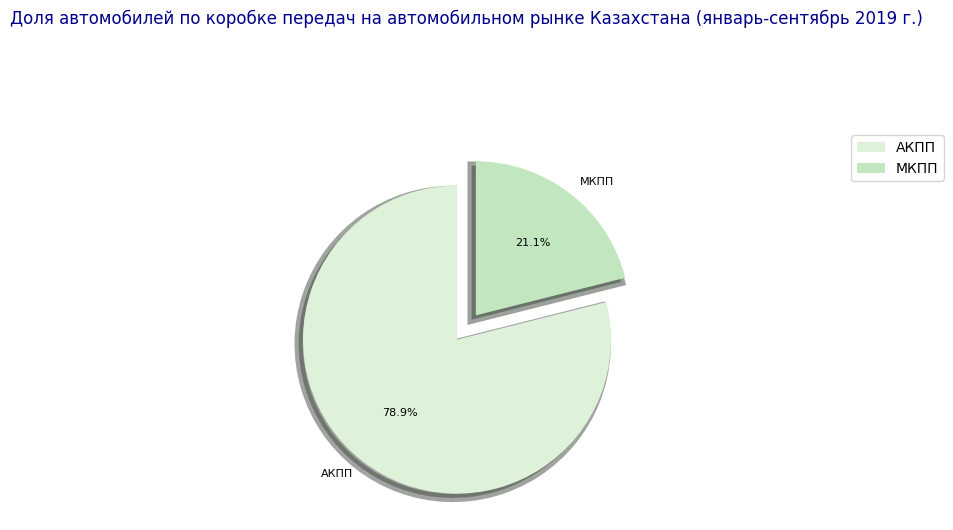

In [48]:
# Построим круговую диаграмму с долей автомобилей по коробке передач в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(5, 5))
explode = [0.1]*2
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['коробка_передач'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':8},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля автомобилей по коробке передач на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['коробка_передач'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- на рынке Казахстана в 2019 г было представлено большое разнообразие автомобилей разной комплектации, однако ТЗ не предусматривает глубокого изучения данного показателя поэтому по коробке передач деление условное - все, что не МКПП, отнесено к АКПП;
- доля различных вариаций АКПП постоянно расчет.

____________
____________

### **3.10. Тип_привода**

In [49]:
# Изучим столбец 'тип_привода' с помощью метода .describe()
df['тип_привода'].describe()

count     39954
unique        4
top         4WD
freq      19580
Name: тип_привода, dtype: object

In [50]:
# Создадим временный датафрейм на базе value_counts() столбца 'тип_привода'
temp = df['тип_привода'].value_counts().reset_index()
temp.columns = ['тип_привода', 'количество_заказов']
temp

,тип_привода,количество_заказов
0,4WD,19580
1,2WD,11889
2,FWD,5803
3,RWD,2682


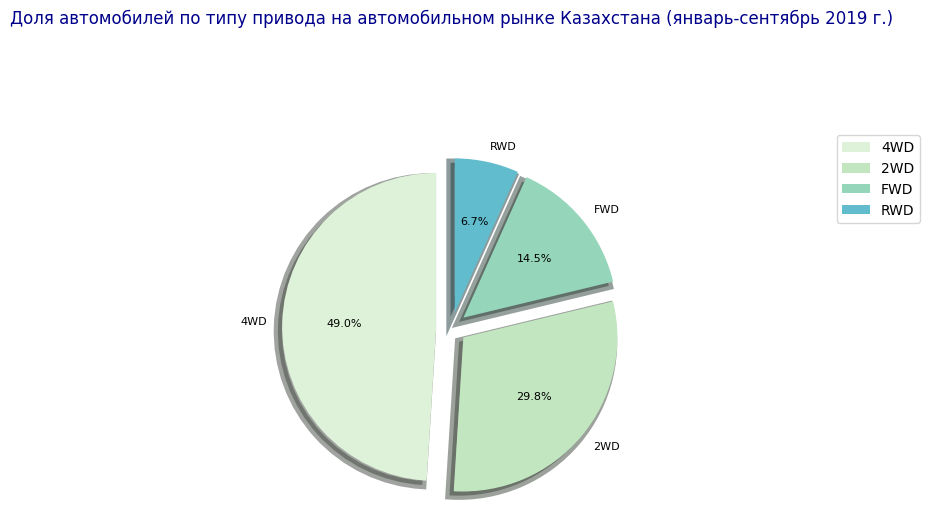

In [51]:
# Построим круговую диаграмму с долей автомобилей по типу привода в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(5, 5))
explode = [0.1]*4
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['тип_привода'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':8},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля автомобилей по типу привода на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['тип_привода'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- на рынке Казахстана в 2019 г представлены автомобили 4-х видов в зависимости от типа привода;
- на автомобили с 4WD и 2WD приходится 79% заказов;
- на автомобили с 4WD приходится 49% заказов.

____________
____________

### **3.11. Регион**

In [52]:
# Изучим столбец 'регион' с помощью метода .describe()
df['регион'].describe()

count      39954
unique         4
top       регион
freq       18726
Name: регион, dtype: object

In [53]:
# Создадим временный датафрейм на базе value_counts() столбца 'регион'
temp = df['регион'].value_counts().reset_index()
temp.columns = ['регион', 'количество_заказов']
temp

,регион,количество_заказов
0,регион,18726
1,Алматы,11175
2,Нур-Султан,8243
3,ЭКСПОРТ,1810


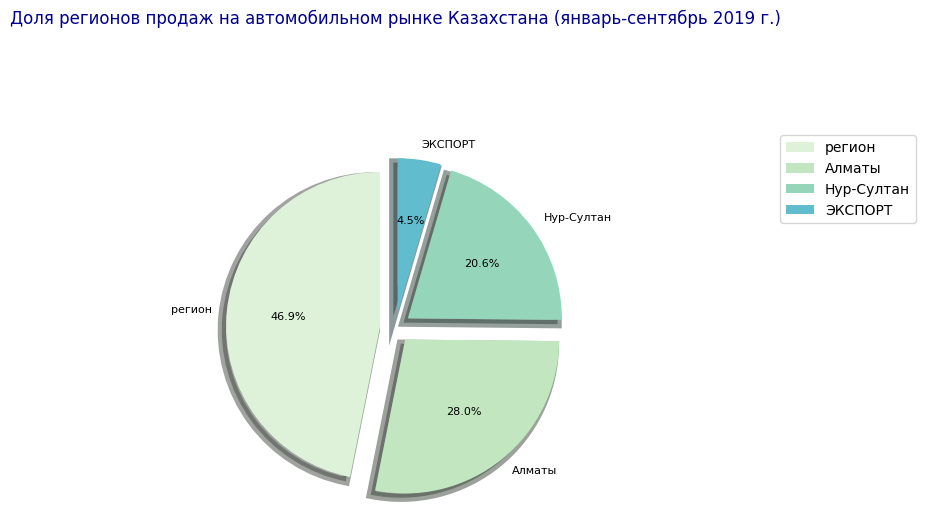

In [54]:
# Построим круговую диаграмму с долей регионов продажи в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(5, 5))
explode = [0.1]*4
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['регион'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':8},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля регионов продаж на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['регион'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- согласно ТЗ регион продаж был укрупнен до 4-х показателей;
- в 2-х столицах количество заказов сопостовимо с количеством заказов по всем регионам страны;
- количество заказов, идущих на экспорт сравнительно невелико - 4.5%.

____________
____________

### **3.12. Количество автомобилей в заказе**

In [55]:
# Изучим столбец 'количество' с помощью метода .describe()
df['количество'].describe()

count    39954.000000
mean         1.348301
std          2.373235
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        115.000000
Name: количество, dtype: float64

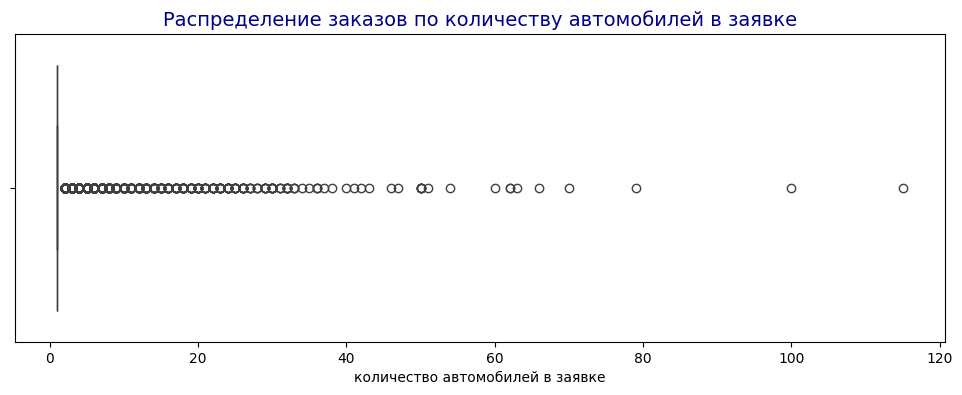

In [56]:
# Построим ящик с усами для визуализации описательных статистик
plt.figure(figsize=(12, 4))
sns.boxplot(x = df['количество'])
plt.xlabel('количество автомобилей в заявке')
plt.title('Распределение заказов по количеству автомобилей в заявке', size=14, color='darkblue')
plt.show()

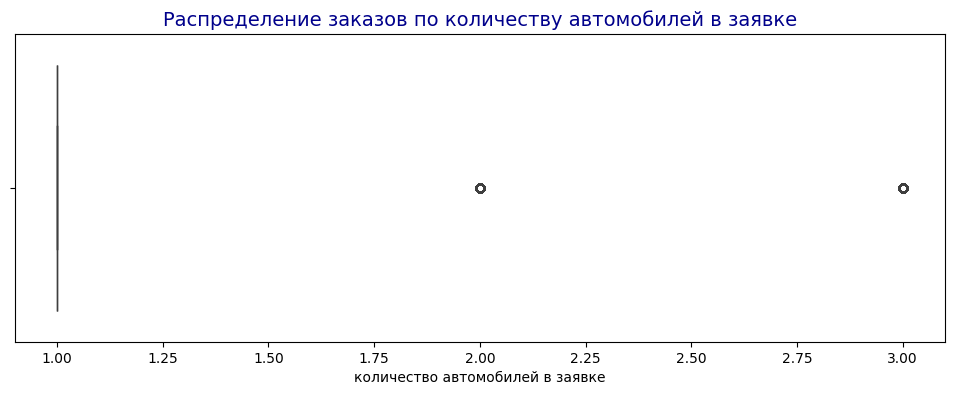

In [57]:
# Построим ящик с усами для визуализации описательных статистик
plt.figure(figsize=(12, 4))
sns.boxplot(x = df.loc[df['количество']<=3, 'количество'])
plt.xlabel('количество автомобилей в заявке')
plt.title('Распределение заказов по количеству автомобилей в заявке', size=14, color='darkblue')
plt.show()

In [58]:
# Создадим временный датафрейм на базе value_counts() столбца 'категория_заказа_количество'
temp = df['категория_заказа_количество'].value_counts().reset_index()
temp.columns = ['категория_заказа_количество', 'количество_заказов']
temp

,категория_заказа_количество,количество_заказов
0,1 автомобиль,37198
1,3-10 автомобилей,1342
2,2 автомобиля,1017
3,11-20 автомобилей,269
4,более 20 автомобилей,128


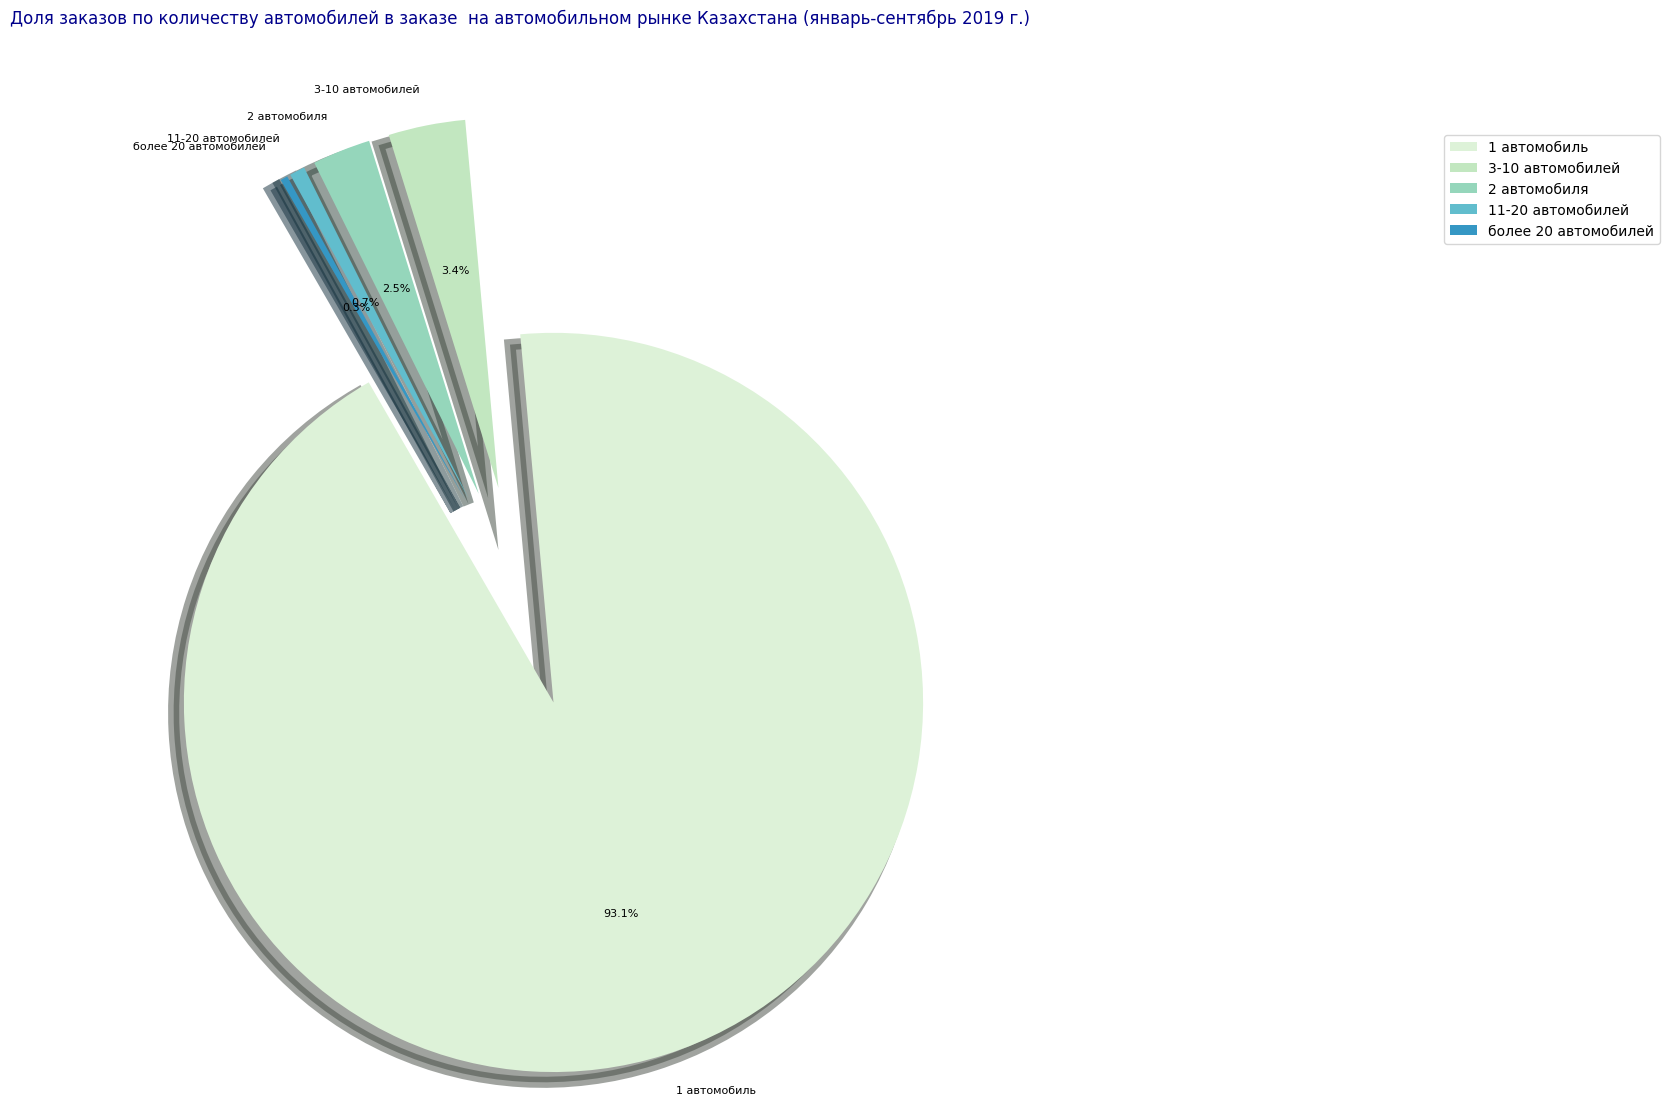

In [59]:
# Построим круговую диаграмму с долей заказов по количеству автомобилей в заказе в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(12, 12))
explode = [0.3]*5
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['категория_заказа_количество'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 120,
        textprops = {'color': 'black','fontsize':8},
        wedgeprops = {'linewidth': 8},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля заказов по количеству автомобилей в заказе  на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['категория_заказа_количество'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- в 93% заказов покупается один автомобиль;
- рекордом стала заявка на покупку 115 автомобилей.
____________
____________

### **3.13. Цена автомобиля (usd)**

In [60]:
# Изучим столбец 'цена(usd)' с помощью метода .describe()
df['цена(usd)'].describe()

count     39954.000000
mean      28249.972572
std       20007.187114
min        7100.000000
25%       15518.500000
50%       24282.270000
75%       32505.660000
max      328510.970000
Name: цена(usd), dtype: float64

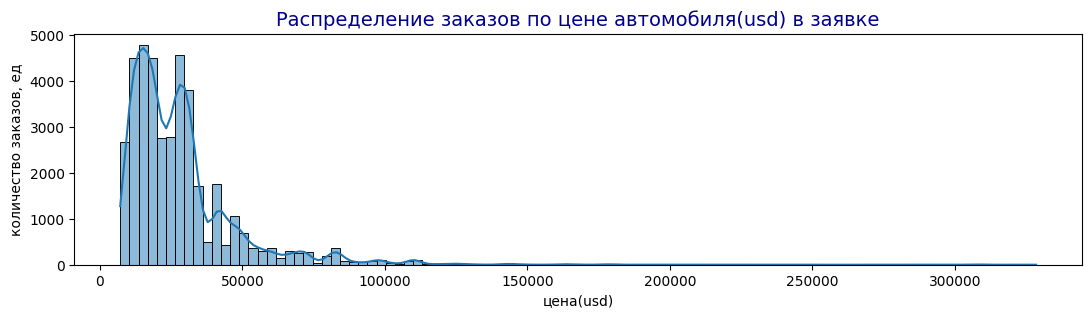

In [61]:
# Построим гистограмму разпределения заказов по цене автомобиля
plt.figure(figsize=(13, 3))
sns.histplot(x = df['цена(usd)'], bins=100, kde=True)
plt.xlabel('цена(usd)')
plt.ylabel('количество заказов, ед')
plt.title('Распределение заказов по цене автомобиля(usd) в заявке', size=14, color='darkblue')
plt.show();

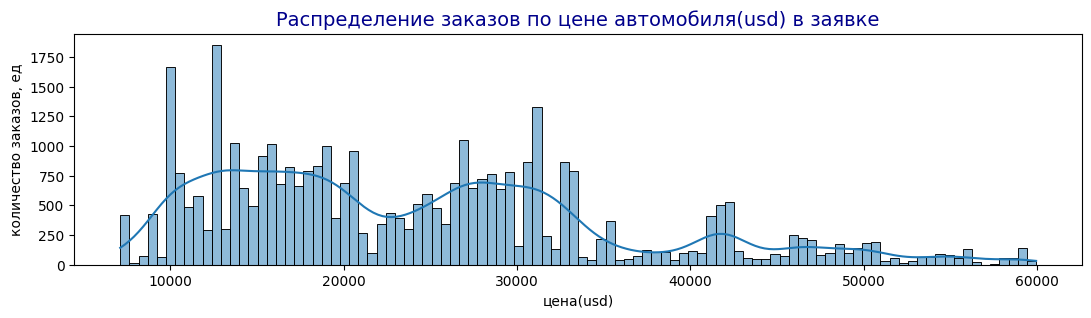

In [62]:
# Укрупним гистограмму разпределения заказов по цене автомобиля
plt.figure(figsize=(13, 3))
sns.histplot(x = df.loc[df['цена(usd)']<60000, 'цена(usd)'], bins=100, kde=True)
plt.xlabel('цена(usd)')
plt.ylabel('количество заказов, ед')
plt.title('Распределение заказов по цене автомобиля(usd) в заявке', size=14, color='darkblue')
plt.show();

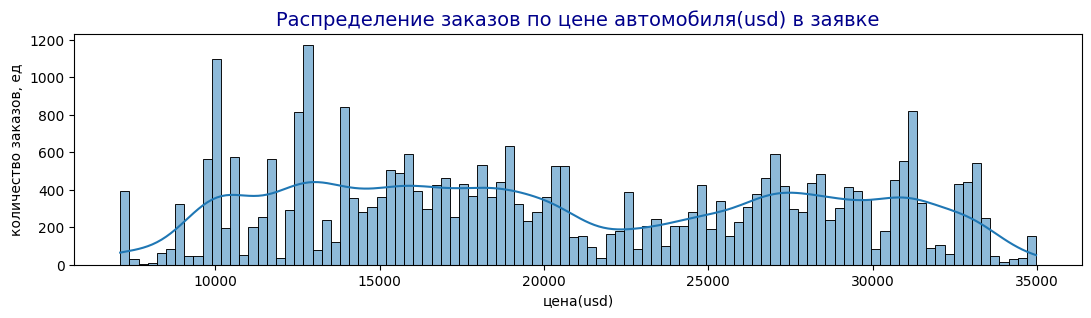

In [63]:
# Укрупним гистограмму разпределения заказов по цене автомобиля
plt.figure(figsize=(13, 3))
sns.histplot(x = df.loc[df['цена(usd)']<35000, 'цена(usd)'], bins=100, kde=True)
plt.xlabel('цена(usd)')
plt.ylabel('количество заказов, ед')
plt.title('Распределение заказов по цене автомобиля(usd) в заявке', size=14, color='darkblue')
plt.show();

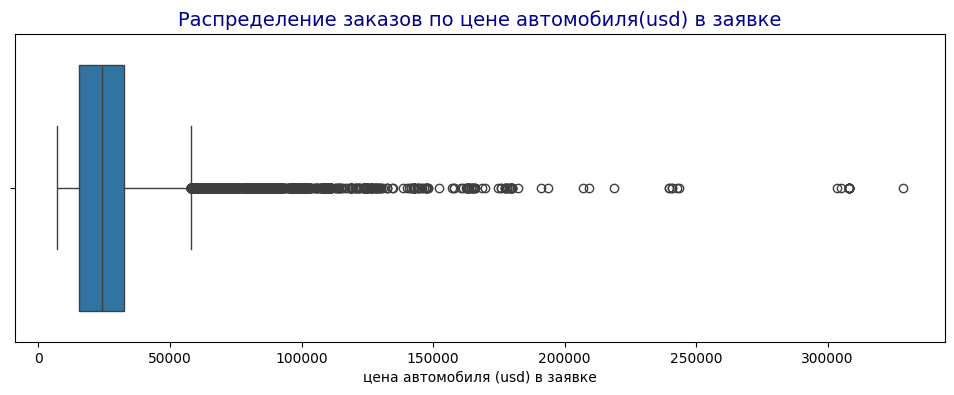

In [64]:
# Построим ящик с усами для визуализации описательных статистик
plt.figure(figsize=(12, 4))
sns.boxplot(x = df['цена(usd)'])
plt.xlabel('цена автомобиля (usd) в заявке')
plt.title('Распределение заказов по цене автомобиля(usd) в заявке', size=14, color='darkblue')
plt.show()

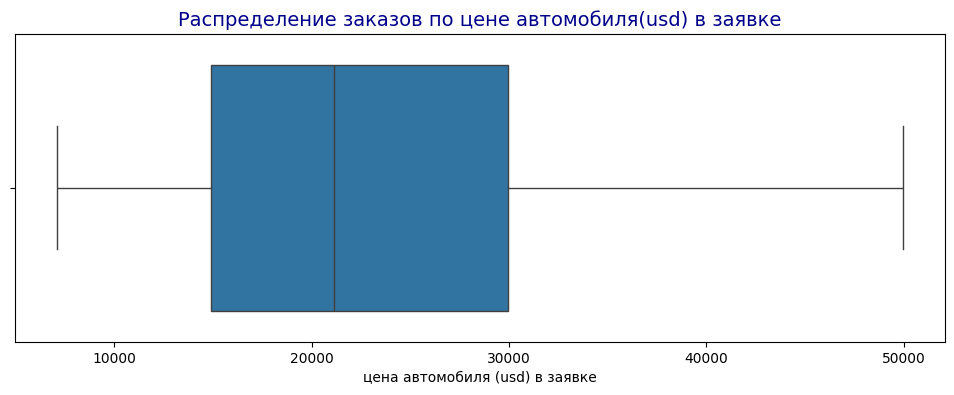

In [65]:
# Укрупним ящик с усами для визуализации описательных статистик
plt.figure(figsize=(12, 4))
sns.boxplot(x = df.loc[df['цена(usd)']<50000, 'цена(usd)'])
plt.xlabel('цена автомобиля (usd) в заявке')
plt.title('Распределение заказов по цене автомобиля(usd) в заявке', size=14, color='darkblue')
plt.show()

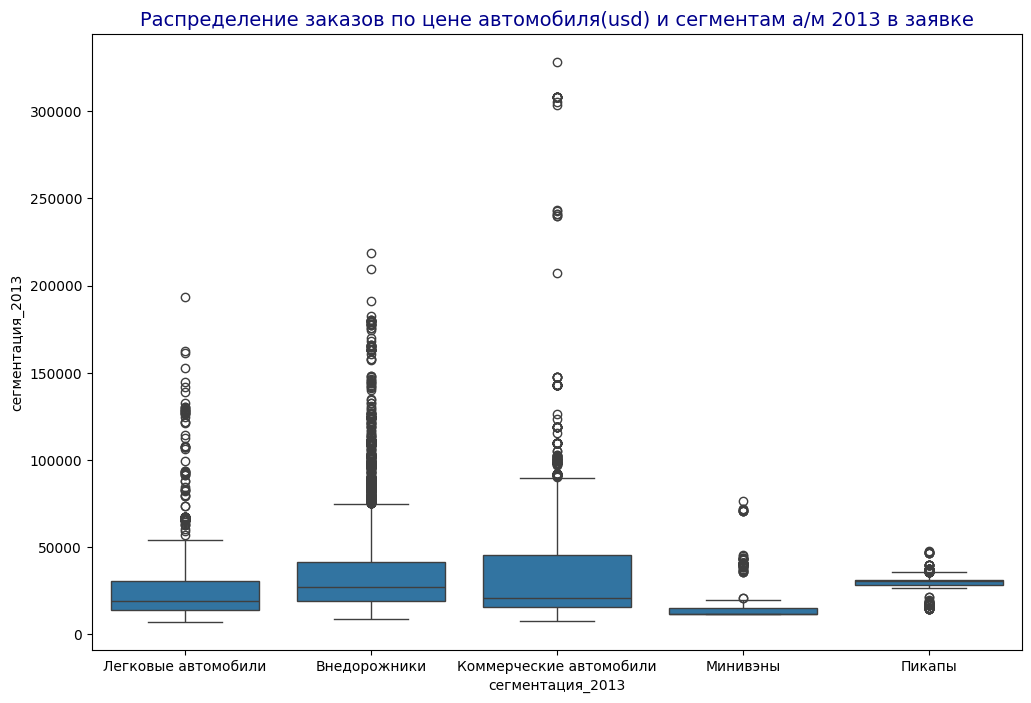

In [70]:
# Построим ящик с усами по цене а/м для разных сегментов
plt.figure(figsize=(12, 8))
sns.boxplot(y = df['цена(usd)'], x = df['сегментация_2013'])
plt.ylabel('цена автомобиля (usd) в заявке')
plt.ylabel('сегментация_2013')
plt.title('Распределение заказов по цене автомобиля(usd) и сегментам а/м 2013 в заявке', size=14, color='darkblue')
plt.show()

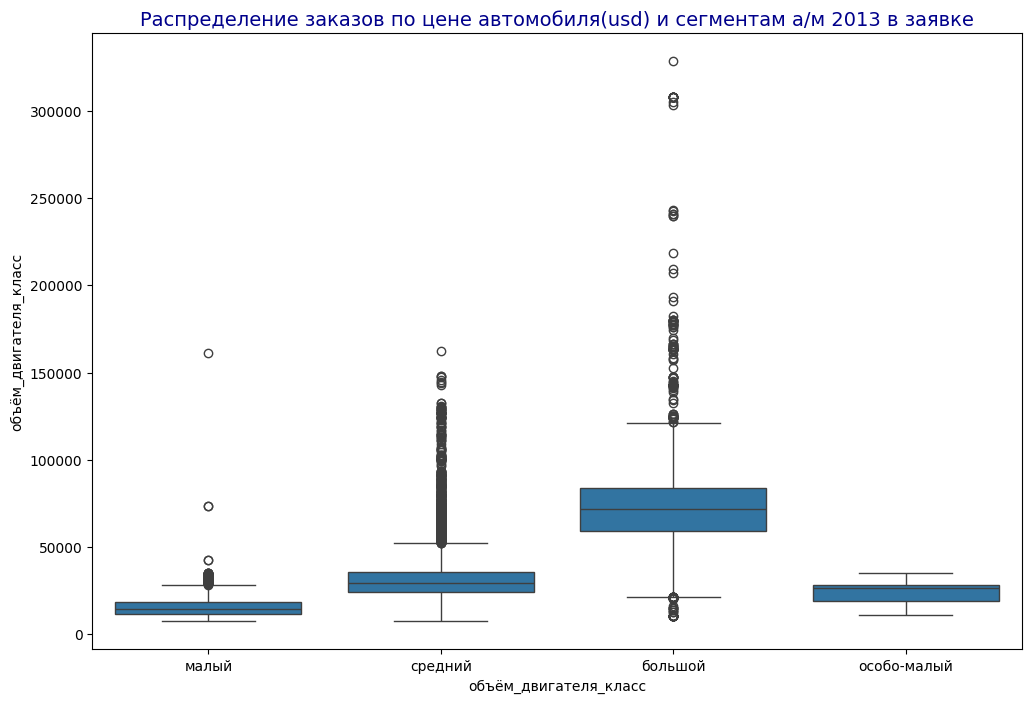

In [71]:
# Построим ящик с усами по цене а/м для разных классов двигателя
plt.figure(figsize=(12, 8))
sns.boxplot(y = df['цена(usd)'], x = df['объём_двигателя_класс'])
plt.ylabel('цена автомобиля (usd) в заявке')
plt.ylabel('объём_двигателя_класс')
plt.title('Распределение заказов по цене автомобиля(usd) и класс по объему двигателя в заявке', size=14, color='darkblue')
plt.show()

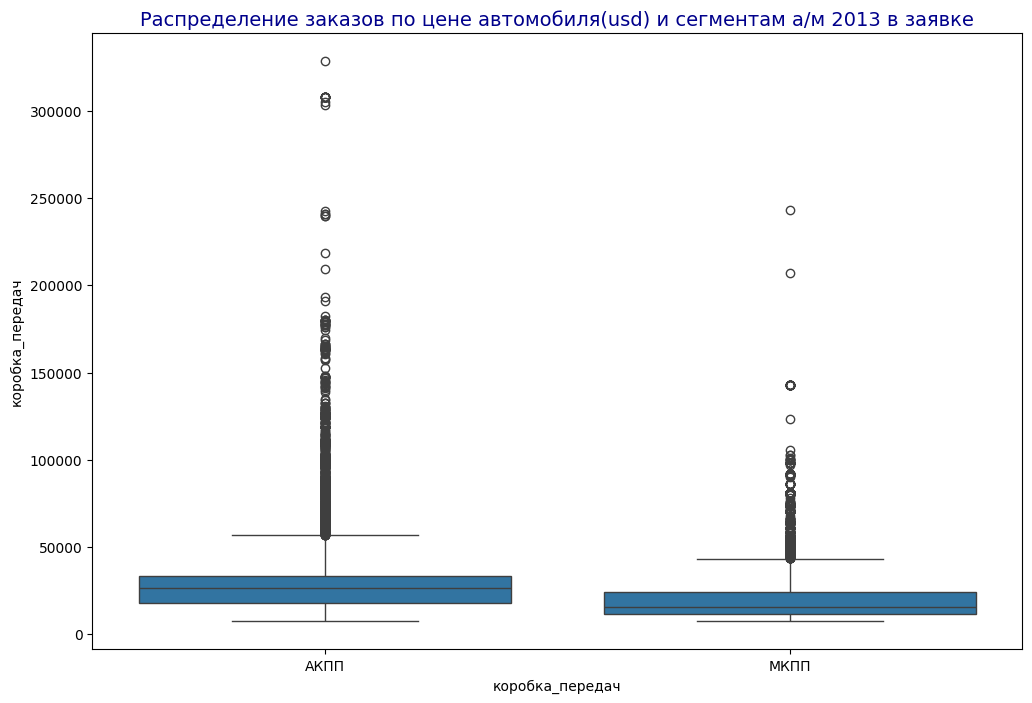

In [72]:
# Построим ящик с усами по цене а/м для разных двигателей с разными КПП
plt.figure(figsize=(12, 8))
sns.boxplot(y = df['цена(usd)'], x = df['коробка_передач'])
plt.ylabel('цена автомобиля (usd) в заявке')
plt.ylabel('коробка_передач')
plt.title('Распределение заказов по цене автомобиля(usd) и тип КПП в заявке', size=14, color='darkblue')
plt.show()

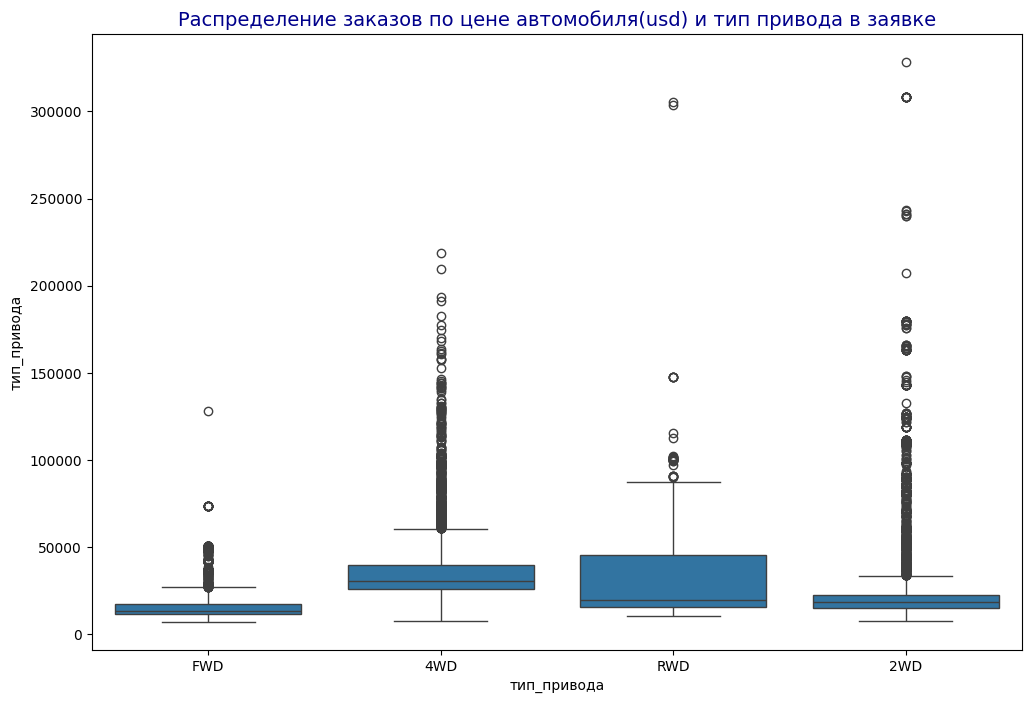

In [73]:
# Построим ящик с усами по цене а/м для разных двигателей с разными типом привода
plt.figure(figsize=(12, 8))
sns.boxplot(y = df['цена(usd)'], x = df['тип_привода'])
plt.ylabel('цена автомобиля (usd) в заявке')
plt.ylabel('тип_привода')
plt.title('Распределение заказов по цене автомобиля(usd) и тип привода в заявке', size=14, color='darkblue')
plt.show()

In [ ]:
# Создадим временный датафрейм на базе value_counts() столбца 'категория_заказа_цена'
temp = df['категория_заказа_цена'].value_counts().reset_index()
temp.columns = ['категория_заказа_цена', 'количество_заказов']
temp

,категория_заказа_цена,количество_заказов
0,от 15.500 до 25.000 USD,10873
1,от 25.000 до 35.000 USD,10808
2,до 15.500 USD,9975
3,от 35.000 до 50.000 USD,4414
4,более 50.000 USD,3884


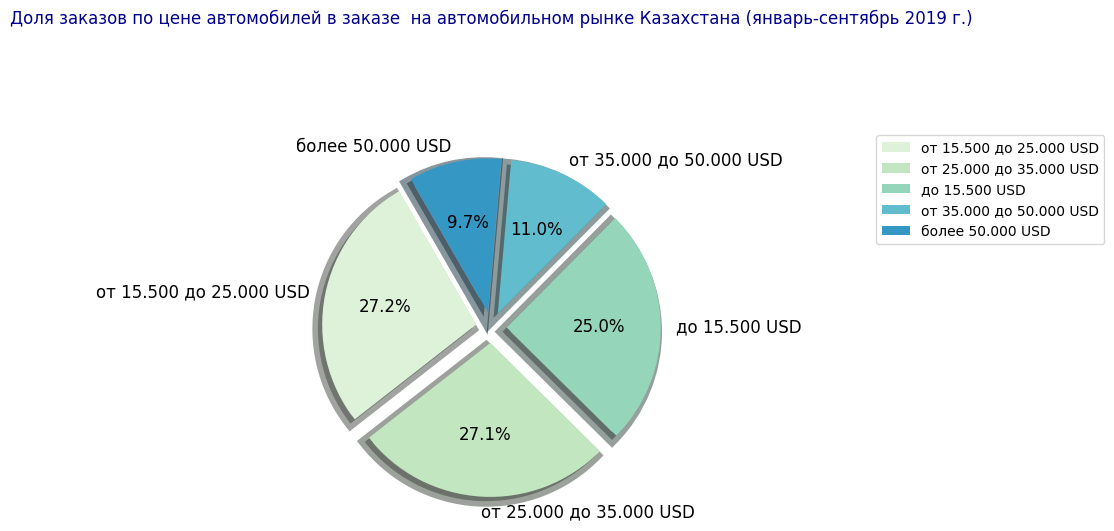

In [ ]:
# Построим круговую диаграмму с долей заказов по цене автомобилей в заказе в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(5, 5))
explode = [0.1]*5
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['категория_заказа_цена'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 120,
        textprops = {'color': 'black','fontsize':12},
        wedgeprops = {'linewidth': 8},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля заказов по цене автомобилей в заказе  на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['категория_заказа_цена'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- Как и следовало ожидать на рынке Казахстана представлены автомобили разных ценовых категорий от 7000 до 328500 USD;
- средняя цена - 28249 USD;
- медианная цена - 24282 USD;
- на гистограмме мы видим некое подобие затухающей синусоиды с несколькими вершинами;
- цена зависит от многих факторов, EDA не ставит целью глубой анализ цен.

В дальнейшем при анализе автомобильного рынка Казахстана можно проанализировать емкость рынка в разных ценовых сегментах.
____________
____________

### **3.14. Общая стоимость заказа(usd)**

In [ ]:
# Изучим столбец 'общая_стоимость_заказа(usd)' с помощью метода .describe()
df['общая_стоимость_заказа(usd)'].describe().apply(lambda x: format(x, 'f'))

count      39954.000000
mean       33763.587017
std        50707.050675
min         7100.000000
25%        16623.530000
50%        26248.960000
75%        35000.000000
max      3778206.260000
Name: общая_стоимость_заказа(usd), dtype: object

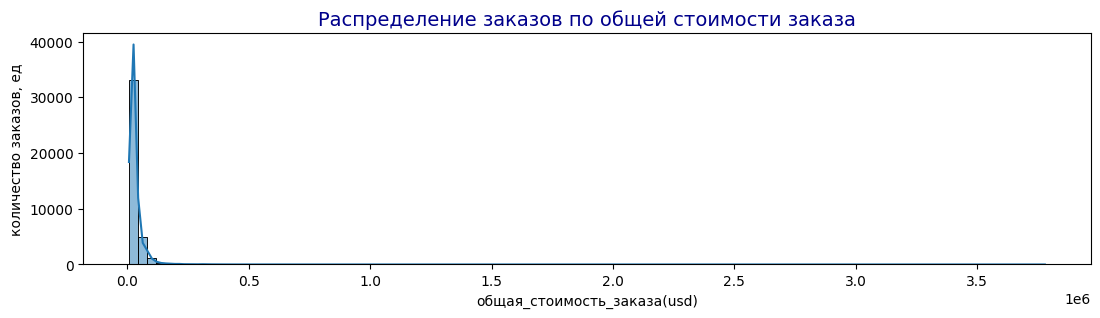

In [ ]:
# Построим гистограмму разпределения заказов по стоимости
plt.figure(figsize=(13, 3))
sns.histplot(x = df['общая_стоимость_заказа(usd)'], bins=100, kde=True)
plt.xlabel('общая_стоимость_заказа(usd)')
plt.ylabel('количество заказов, ед')
plt.title('Распределение заказов по общей стоимости заказа', size=14, color='darkblue')
plt.show();

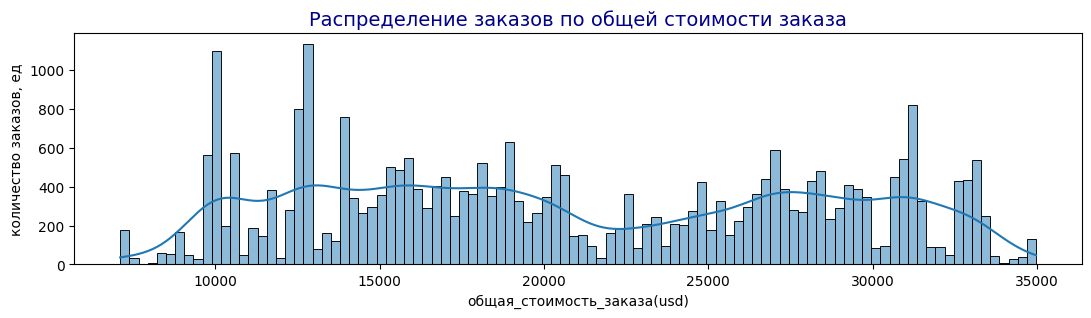

In [ ]:
# Укрупним гистограмму разпределения заказов по стоимости
plt.figure(figsize=(13, 3))
sns.histplot(x = df.loc[df['общая_стоимость_заказа(usd)']<35000, 'цена(usd)'], bins=100, kde=True)
plt.xlabel('общая_стоимость_заказа(usd)')
plt.ylabel('количество заказов, ед')
plt.title('Распределение заказов по общей стоимости заказа', size=14, color='darkblue')
plt.show();

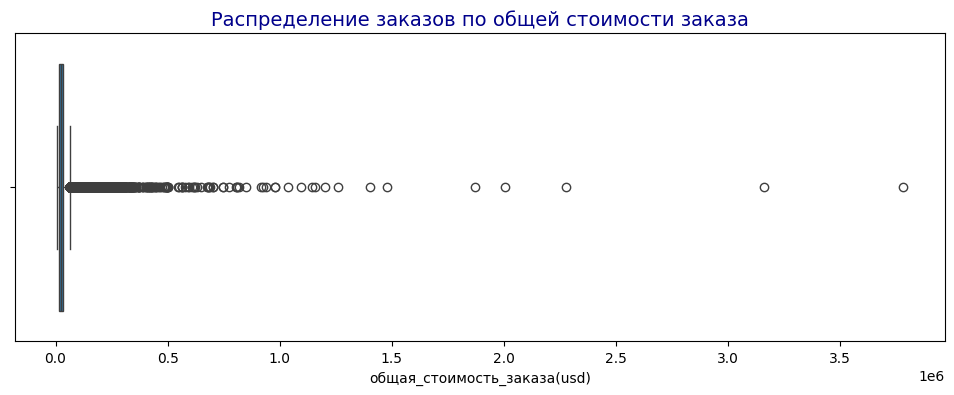

In [ ]:
# Построим ящик с усами для визуализации описательных статистик
plt.figure(figsize=(12, 4))
sns.boxplot(x = df['общая_стоимость_заказа(usd)'])
plt.xlabel('общая_стоимость_заказа(usd)')
plt.title('Распределение заказов по общей стоимости заказа', size=14, color='darkblue')
plt.show()

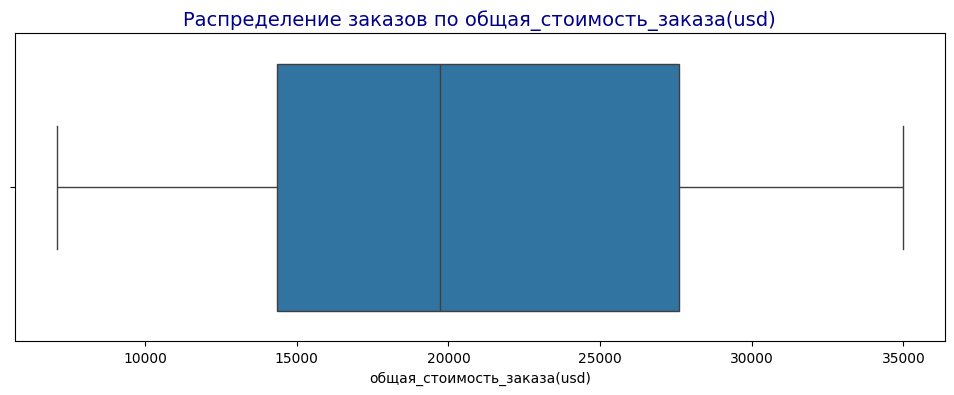

In [ ]:
# Укрупним ящик с усами для визуализации описательных статистик
plt.figure(figsize=(12, 4))
sns.boxplot(x = df.loc[df['общая_стоимость_заказа(usd)']<35000, 'цена(usd)'])
plt.xlabel('общая_стоимость_заказа(usd)')
plt.title('Распределение заказов по общая_стоимость_заказа(usd)', size=14, color='darkblue')
plt.show()

______
_____
**Промежутоный вывод:**

- учитывая, что 93% заказов включают в себя 1 автомобиль распределение заказов по общей стоимости похоже на распределение цены автомобиля в заказе;
- наличие заказов с большим количеством машин - в данном распределении сильнее выражен правый хвост;
- средняя стоимость заказа 33763 USD;
- медианная стоимость заказа - 26248 USD;
- максимальная стоимость заказа - 3778206 USD.
____________
____________

### **3.15. Область**

In [ ]:
# Изучим столбец 'область' с помощью метода .describe()
df['область'].describe()

count        39954
unique          18
top       г.Алматы
freq         11175
Name: область, dtype: object

In [ ]:
# Создадим временный датафрейм на базе value_counts() столбца 'область'
# Выведем топ-5 областей по количеству заказов авто в анализируемом периоде
temp = df['область'].value_counts().reset_index()
temp.columns = ['область', 'количество_заказов']
temp.head(5)

,область,количество_заказов
0,г.Алматы,11175
1,г.Нур-Султан,8243
2,Южно-Казахстанская область,2879
3,Костанайская область,2494
4,Атырауская область,2164


In [ ]:
# Выведем анти_топ-5 областей по количеству заказов в анализируемом периоде
temp.tail(5)

,область,количество_заказов
13,Северо-Казахстанская область,508
14,Акмолинская область,471
15,Алматинская область,268
16,Жамбылская область,203
17,Туркестанская область,19


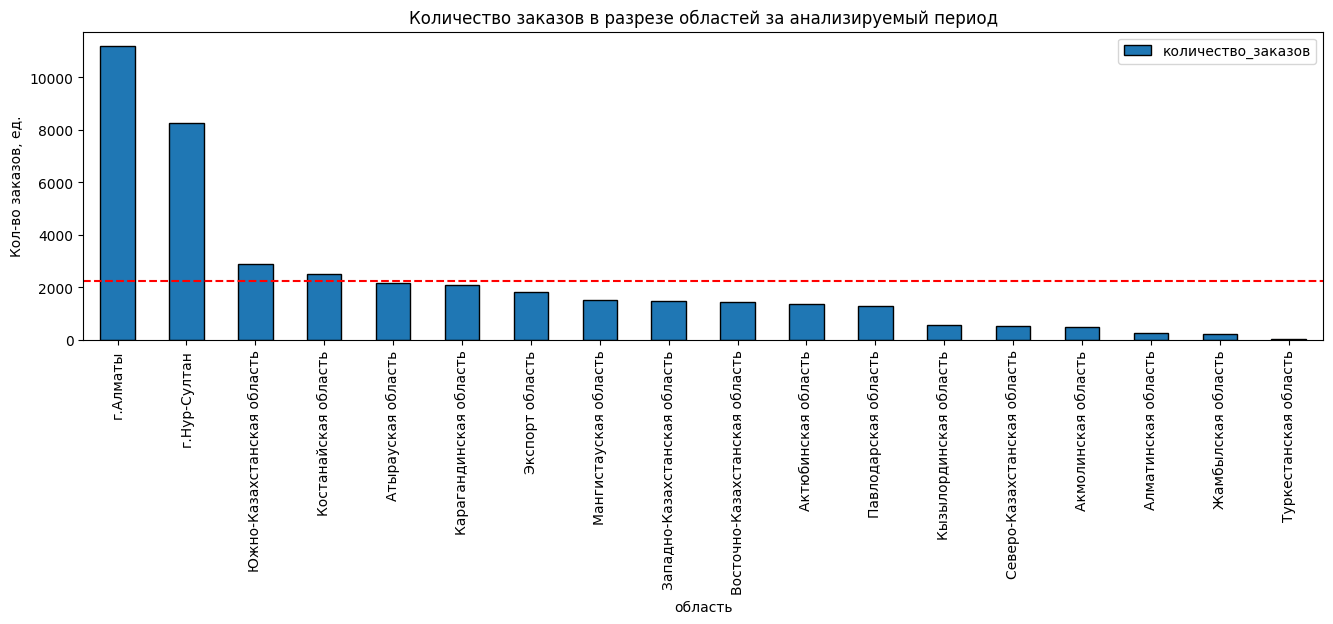

In [ ]:
# Построим график количество заказов в разрезе областей за анализируемый период
temp.head(40).plot(x = 'область', y = 'количество_заказов', kind = 'bar', figsize=(16, 4), edgecolor = 'black')
plt.axhline(y = temp['количество_заказов'].mean(), color = 'r', linestyle = '--')
plt.title('Количество заказов в разрезе областей за анализируемый период')
plt.xlabel('область')
plt.ylabel('Кол-во заказов, ед.')
plt.show();

In [ ]:
# Создадим временный датафрейм для определения доли топ-5 областей на авторынке Казахстана
def cat(temp):
  if temp['количество_заказов']>2100:
    return temp['область']
  else:
    return 'прочие'
temp['область'] = temp.apply(cat, axis = 1)
temp = temp.groupby('область').agg({'количество_заказов':'sum'}).reset_index().sort_values(by='количество_заказов', ascending=False)
temp

,область,количество_заказов
5,прочие,12999
3,г.Алматы,11175
4,г.Нур-Султан,8243
2,Южно-Казахстанская область,2879
1,Костанайская область,2494
0,Атырауская область,2164


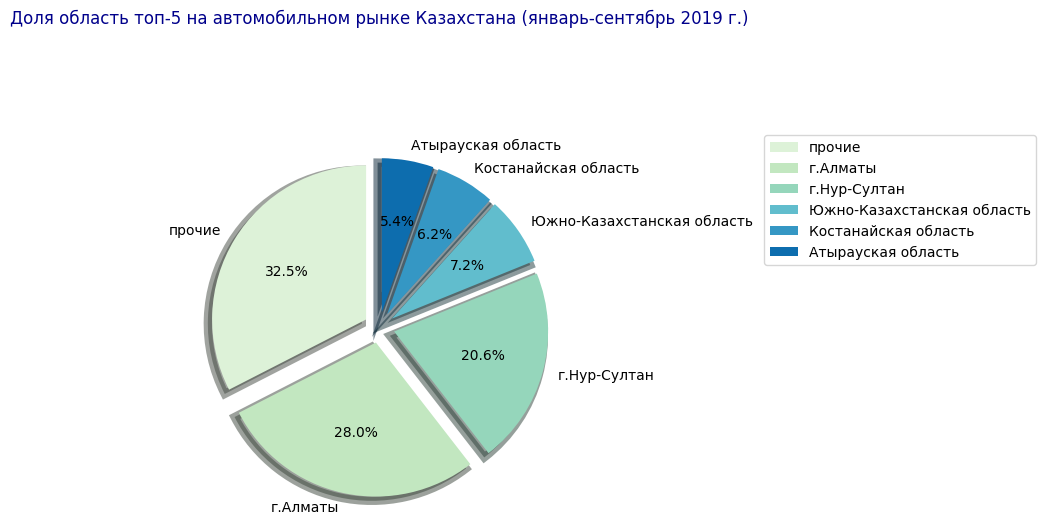

In [ ]:
# Построим круговую диаграмму с долей областей в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(5, 5))
explode = [0.1]*6
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['область'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':10},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля область топ-5 на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['область'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- на рынке Казахстана 18 областей, в которых продаются автомобили;
- только 4 области имели количество заказов выше среднего по рынку;
- на долю 2 столиц приходится 49% заказов.
____________
____________

### **3.16. Сегментация_2013**

In [ ]:
# Изучим столбец 'сегментация_2013' с помощью метода .describe()
df['сегментация_2013'].describe()


count            39954
unique               5
top       Внедорожники
freq             17925
Name: сегментация_2013, dtype: object

In [ ]:
# Создадим временный датафрейм на базе value_counts() столбца 'сегментация_2013'
temp = df['сегментация_2013'].value_counts().reset_index()
temp.columns = ['сегментация_2013', 'количество_заказов']
temp

,сегментация_2013,количество_заказов
0,Внедорожники,17925
1,Легковые автомобили,16329
2,Коммерческие автомобили,4324
3,Пикапы,974
4,Минивэны,402


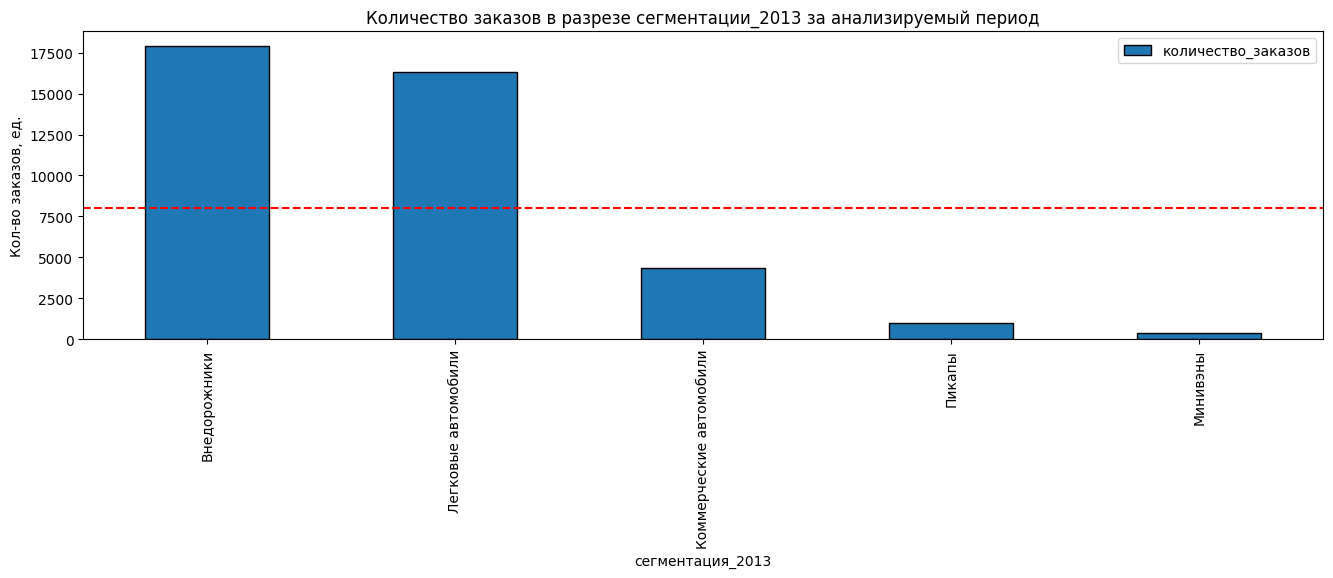

In [ ]:
# Построим график количество заказов в разрезе сегментации_2013 за анализируемый период
temp.head(40).plot(x = 'сегментация_2013', y = 'количество_заказов', kind = 'bar', figsize=(16, 4), edgecolor = 'black')
plt.axhline(y = temp['количество_заказов'].mean(), color = 'r', linestyle = '--')
plt.title('Количество заказов в разрезе сегментации_2013 за анализируемый период')
plt.xlabel('сегментация_2013')
plt.ylabel('Кол-во заказов, ед.')
plt.show();

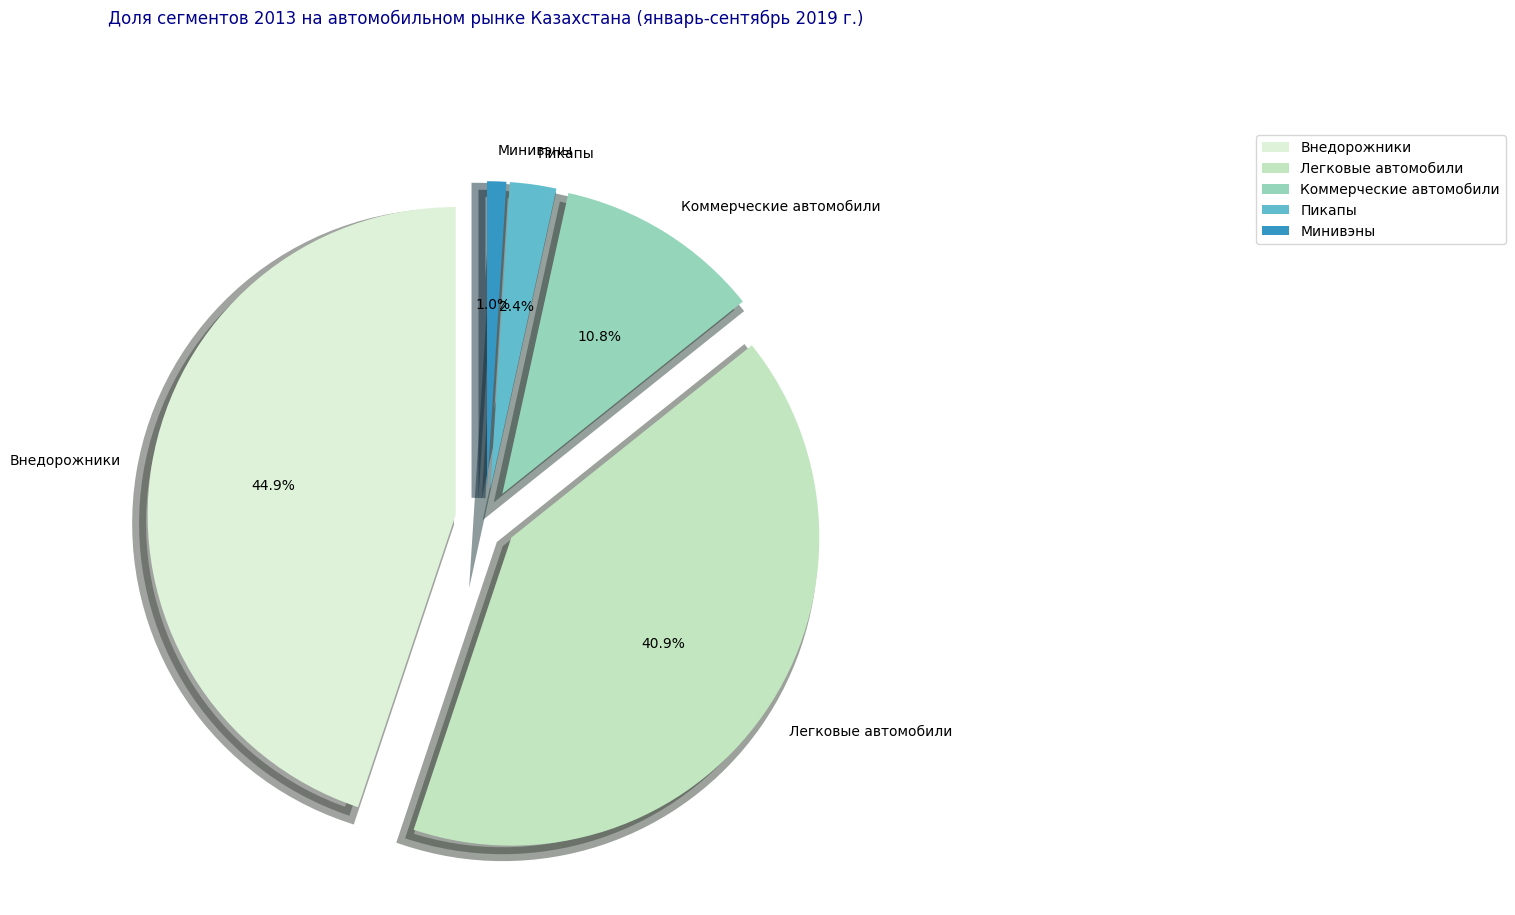

In [ ]:
# Построим круговую диаграмму с долей сегментов 2013 в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(10, 10))
explode = [0.1]*5
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['сегментация_2013'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':10},
        wedgeprops = {'linewidth': 10},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля сегментов 2013 на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['сегментация_2013'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- сегментация 2013 включает в себя 5 типов автомобилей;
- на 2 типа автомобилей: внедорожники и легковые автомобили приходится 85% заказов;
- наименьшую долю в заказах занимаюи минивэны - 1%.
____________
____________

### **3.17. Класс_2013**

In [ ]:
# Изучим столбец 'класс_2013' с помощью метода .describe()
df['класс_2013'].describe()

count       39954
unique         21
top       B класс
freq         7026
Name: класс_2013, dtype: object

In [ ]:
# Создадим временный датафрейм на базе value_counts() столбца 'класс_2013'
# Выведем топ-5 областей по классу 2013 авто в анализируемом периоде
temp = df['класс_2013'].value_counts().reset_index()
temp.columns = ['класс_2013', 'количество_заказов']
temp.head(5)

,класс_2013,количество_заказов
0,B класс,7026
1,Компактные SUV,6592
2,D класс,5383
3,Субкомпактные SUV,5339
4,Среднеразмерные SUV,3993


In [ ]:
# Выведем анти_топ-5 классов 2013 по количеству заказов в анализируемом периоде
temp.tail(5)

,класс_2013,количество_заказов
16,Средние автобусы,57
17,Полноразмерный Минивэн,48
18,A класс,42
19,F класс,40
20,Спортивные автомобили,10


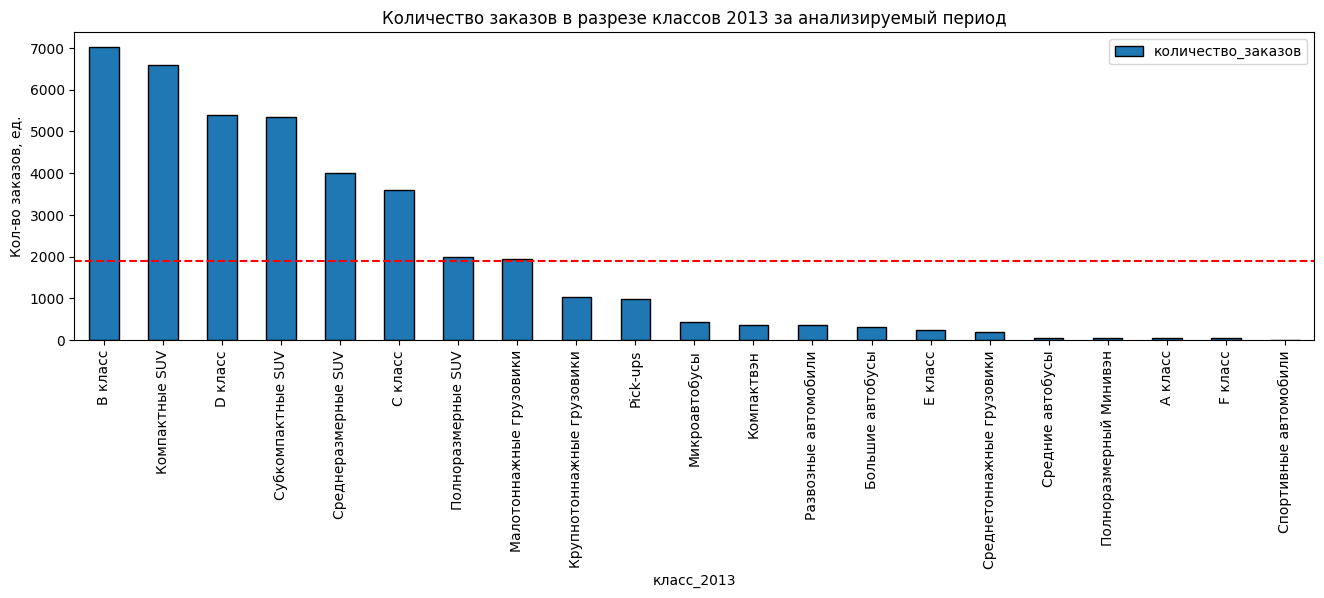

In [ ]:
# Построим график количество заказов в разрезе классов 2013 за анализируемый период
temp.head(40).plot(x = 'класс_2013', y = 'количество_заказов', kind = 'bar', figsize=(16, 4), edgecolor = 'black')
plt.axhline(y = temp['количество_заказов'].mean(), color = 'r', linestyle = '--')
plt.title('Количество заказов в разрезе классов 2013 за анализируемый период')
plt.xlabel('класс_2013')
plt.ylabel('Кол-во заказов, ед.')
plt.show();

In [ ]:
# Создадим временный датафрейм для определения доли классов 2013 на авторынке Казахстана
def cat(temp):
  if temp['количество_заказов']>3900:
    return temp['класс_2013']
  else:
    return 'прочие'
temp['класс_2013'] = temp.apply(cat, axis = 1)
temp = temp.groupby('класс_2013').agg({'количество_заказов':'sum'}).reset_index().sort_values(by='количество_заказов', ascending=False)
temp

,класс_2013,количество_заказов
5,прочие,11621
0,B класс,7026
2,Компактные SUV,6592
1,D класс,5383
4,Субкомпактные SUV,5339
3,Среднеразмерные SUV,3993


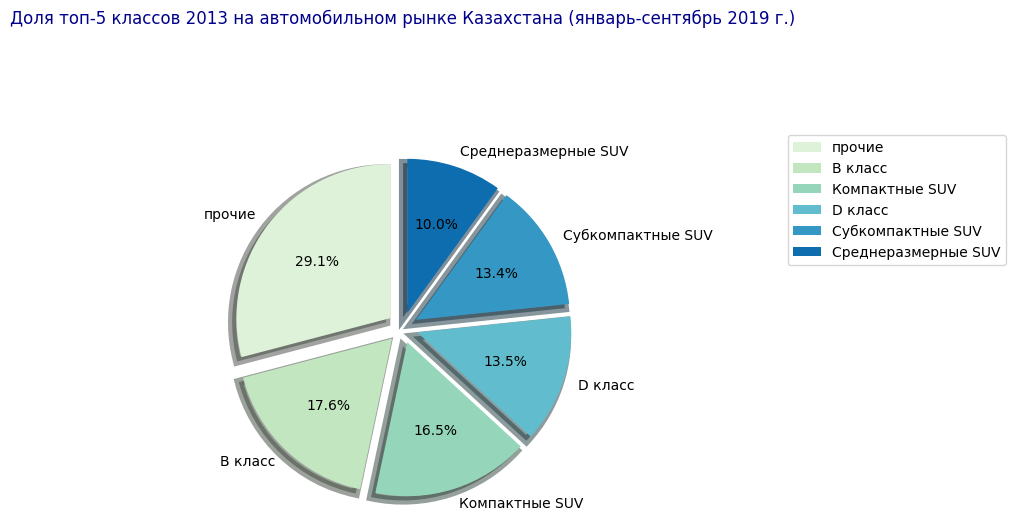

In [ ]:
# Построим круговую диаграмму с долей областей в общем кол-ве заказов на рынке Казахстана в анализируемом периоде
plt.figure(figsize=(5, 5))
explode = [0.1]*6
colors = sns.color_palette('GnBu')
plt.pie(temp['количество_заказов'],
        labels = temp['класс_2013'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':10},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля топ-5 классов 2013 на автомобильном рынке Казахстана (январь-сентябрь 2019 г.)', loc='center', size=12, color='darkblue', pad=80)
plt.legend(temp['класс_2013'].unique(), bbox_to_anchor=( 1.5 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

______
_____
**Промежутоный вывод:**

- на рынке Казахстана выделюют 21 класс автомобиля;
- на топ-5 классов автомоблей приходитсся 71% заказов;
- на долю 2 самых крупных классов: В класса и класса компактных SUV приходится 34% от общего количества заказов..
____________
____________

### **3.18. Общий вывод по исследовательскому анализу**

Основная задача EDA дать понимание структуры и характеристик набора данных. Думаю, с этой целью мы справились, по каждому столбцу датафрейма с исходными данными были изучены описательные статистики, построины их визуализации и сформулированы промежуточные выводы.

**Самые интересные выводы, сделанные в рамках EDA:**

- 56% сделок на автомобильном рынке Казахстана приходится на 2 компании: Toyota Motor Kazakhstan и Astana Motors;

- 53% сделок приходятся на 2 бренда: Toyota и Hyundai;

- 48% сделок проходят в 2-х столичных городах: Алматы и Нур-Султан;

- 2 самых популярных сегмента а/м внедорожники и легковые автомобили, причем лидируют по кол-ву заказов - внедорожники.

Далее в рамках проекта продолжим более глубокий анализ автомобильного рынка Казахстана.